In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import re
from pathlib import Path
from typing import Tuple, List, Optional, Union, Tuple
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import string
import seaborn as sns
import datetime
from itertools import permutations
import heapq
import csv
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import pickle
import matplotlib.ticker as mtick
import collections
from statsmodels.stats.proportion import proportions_ztest
import random
from matplotlib.font_manager import FontProperties
from random import shuffle
import ast
from cycler import cycler
from collections import Counter

font = FontProperties()
font.set_family('serif')
font.set_size(16)
font.set_name('Times New Roman')

# pd.options.display.max_colwidth = 500
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
# .csv configuration
encoding = "utf-8"
delimiter = None
working_directory_path = "./"

# RQ1

## Answer Duration - stack

In [4]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sklearn = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [5]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_df_nltk_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_nltk_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_nltk = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [6]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_df_pt_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_pt_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_pt = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [7]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_df_keras_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_keras_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_keras = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [8]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_df_hf_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_hf_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_hug = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [9]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_df_sp_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sp_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sp = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [10]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_df_tf_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_tf_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_tf = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [11]:
result_tf

,Question Type,Hours,Type
0,with stack trace,20.207500,First Answer
1,with stack trace,0.968611,First Answer
2,with stack trace,1.003611,First Answer
3,with stack trace,45.674722,First Answer
4,with stack trace,3.230278,First Answer
...,...,...,...
45579,w/o stack trace,1.441944,First Accepted Answer
45580,w/o stack trace,NaN,First Accepted Answer
45581,w/o stack trace,NaN,First Accepted Answer
45582,w/o stack trace,NaN,First Accepted Answer


Text(0.5, 0.98, 'Answers Duration (Questions)')

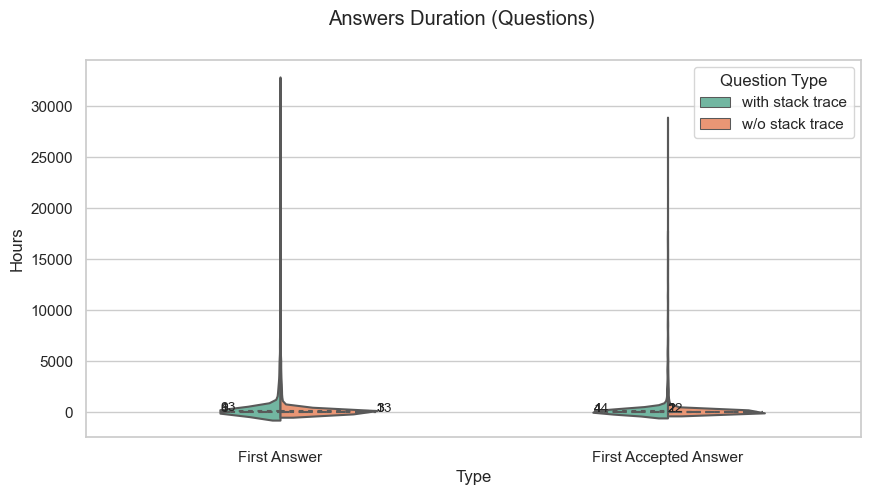

In [12]:
sns.set_theme(style="whitegrid")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

resultComment = pd.concat([df_1, df_2])
resultComment['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

resultAnswer = pd.concat([df_1, df_2])
resultAnswer['Type'] = "First Accepted Answer"
# ###################################################################################

result_2 = pd.concat([resultComment, resultAnswer], ignore_index=True)

fig = plt.figure(figsize=(10, 5), dpi=100)

ax = sns.violinplot(x="Type", 
               y="Hours", 
               data=result_2, 
               hue="Question Type", 
               palette="Set2", #colorblind
               split=True, 
               # scale="count",
               inner="quartile",
               # scale_hue=False,
               width=.5)

# plt.ylim(-5000,10000)
# plt.xlim(-1,1)

for l in ax.lines:
    ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.0f}',size='small') 

fig.suptitle('Answers Duration (Questions)')
# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')

# plt.show()

In [13]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

(-100.0, 4000.0)

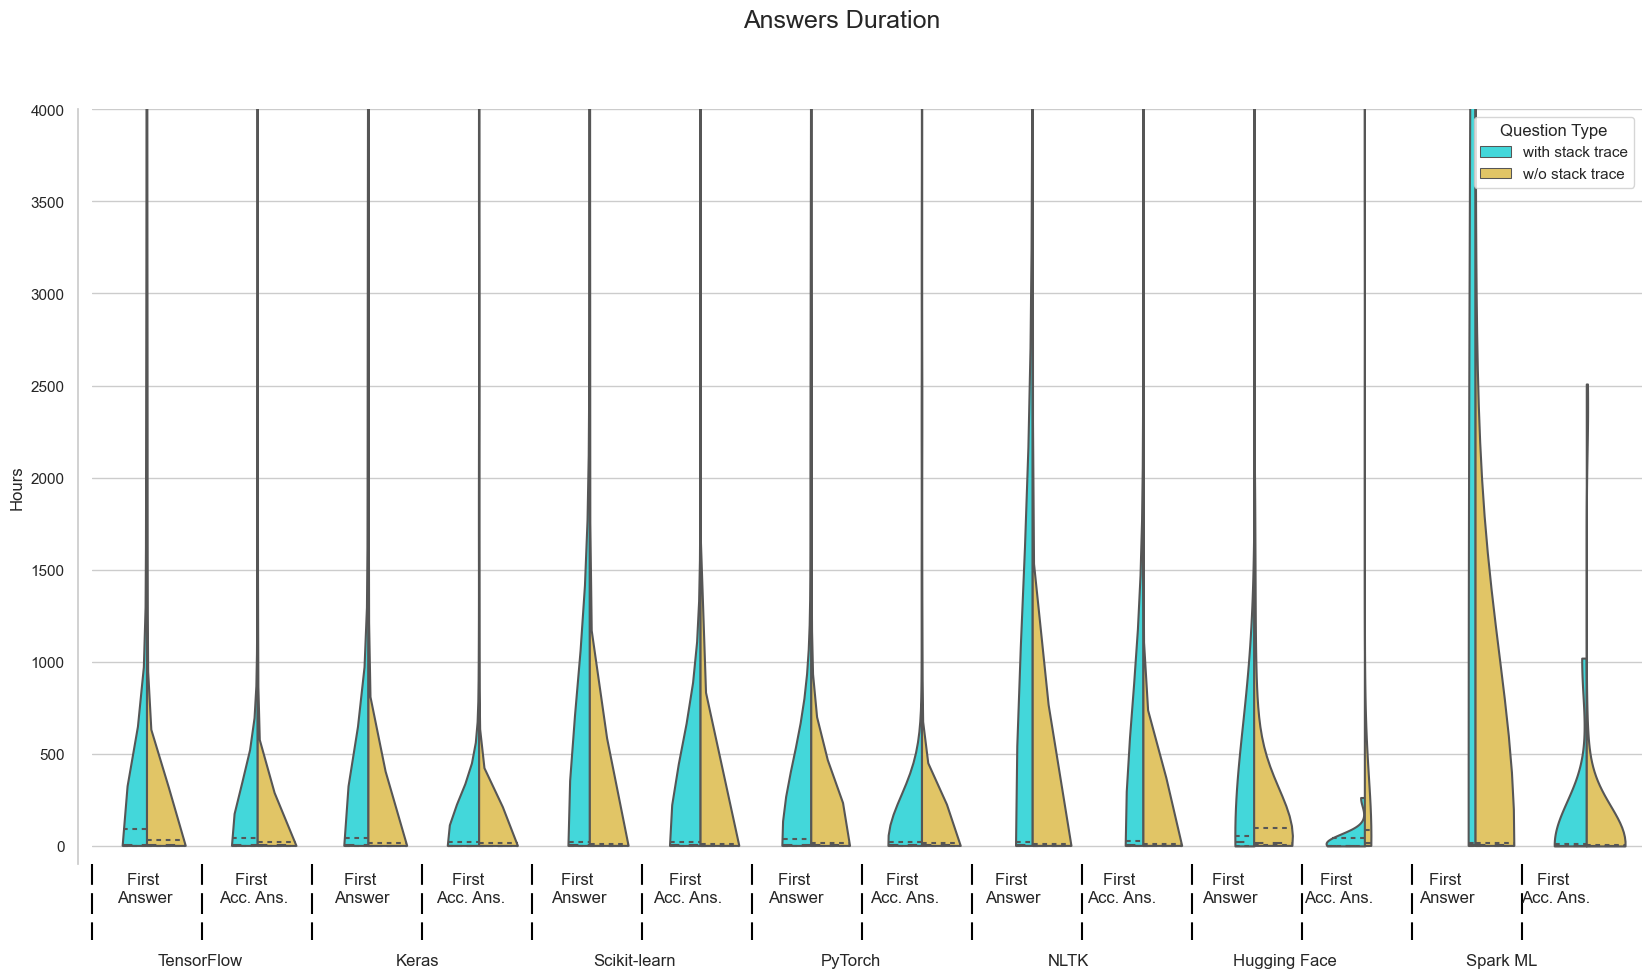

In [14]:
# Example:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

# result = result[result.Hours<30000]

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Hours", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   cut=0,
                  # dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 4), ('Keras', 4), ('Scikit-learn', 4), ('PyTorch', 4), ('NLTK', 4), ('Hugging Face', 4), ('Spark ML', 4)], 
          [('First \nAnswer', 2), ('First \nAcc. Ans.', 2),
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2)]]
xposs = [] 
yposs = [] 
while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        if rpos == 2:
            ax.text(lxpos- 0.0005, (ypos/2), label, ha='center', transform=ax.transAxes)
            xposs.append(pos * (scale + 0.0005))
            yposs.append(ypos)
            add_line(ax, pos * (scale + 0.0005), ypos, flag=0)
        else:
            ax.text(lxpos, 2*ypos/3, label, ha='center', transform=ax.transAxes)
            # add_line(ax, pos *  (scale + 0.0005), ypos, flag=1)

        pos += rpos
    # add_line(ax, pos * (scale + 0.0007), ypos + 0.025)
    ypos -= .1
    
sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
fig.suptitle('Answers Duration', fontsize = 18)

# g2.set(title='subtitle')
g2.set(xlabel=None)
# g2.tick_params(bottom=False)  # remove the ticks
g2.set(ylim=(0, 4000))
g2.set_ylim(bottom=-100)
# plt.ylim(-100,6000)

# Labels
# plt.ylabel('Magnitude', fontsize=20)
# plt.xlabel('')

# Legend
# plt.legend(frameon=False, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
# plt.text(5.85, 10.83, 'Legend title', fontsize=20)

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')

# plt.show()

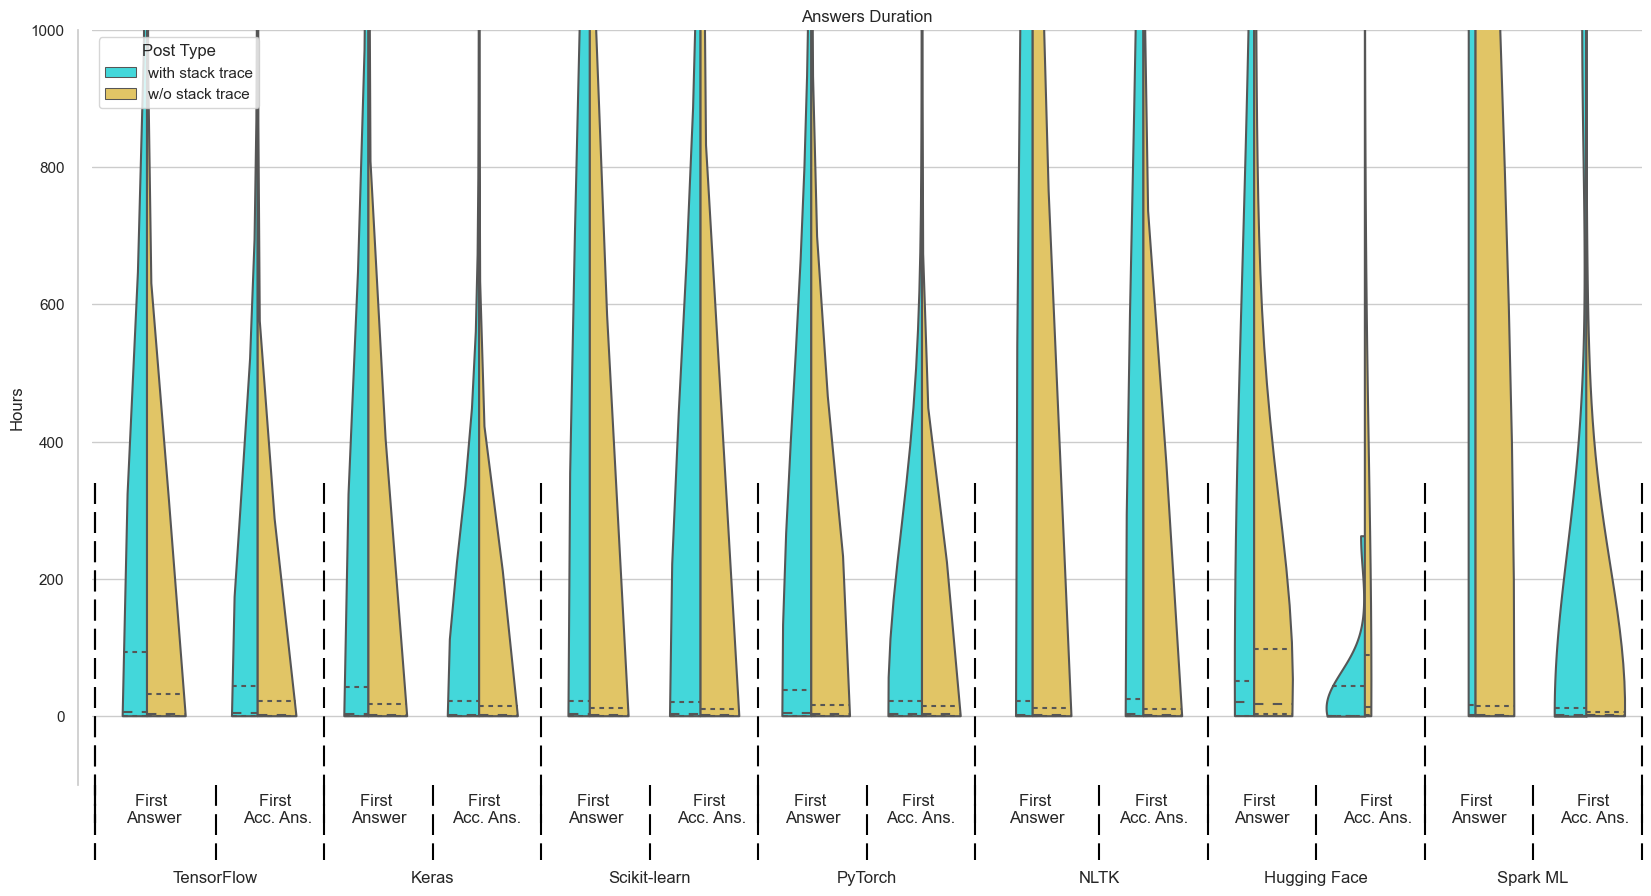

In [15]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

# result = result[result.Hours<30000]

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Hours", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   cut=0,
                  # dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 4), ('Keras', 4), ('Scikit-learn', 4), ('PyTorch', 4), ('NLTK', 4), ('Hugging Face', 4), ('Spark ML', 4)], 
          [('First \nAnswer', 2), ('First \nAcc. Ans.', 2),
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2)]]

xposs = [0.002, 0.08, 0.15, 0.22, 0.29, 0.36, 0.43, 0.5, 0.57, 0.65, 0.72, 0.79, 0.86, 0.93, 0.002, 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.04, 0.12, 0.185, 0.255, 0.325, 0.40, 0.465, 0.535, 0.61, 0.685, 0.755, 0.83, 0.895, 0.97, 0.08, 0.22, 0.36, 0.5, 0.65, 0.79, 0.93]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        if rpos == 2:
            ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes)
            # ax.text(lxpos- 0.0005, (ypos/2), label, ha='center', transform=ax.transAxes)
            tx_poss.append(lxpos- 0.0005)
            ty_poss.append((ypos/2))
            add_line(ax, xposs[i], yposs[i], flag=0)
        else:
            # ax.text(lxpos, 2*ypos/3, label, ha='center', transform=ax.transAxes)
            ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes)
            # xposs.append(pos * (scale + 0.0005))
            # yposs.append(ypos)
            # add_line(ax, pos *  (scale + 0.0005), ypos, flag=1)
            add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    # add_line(ax, pos * (scale + 0.0007), ypos + 0.025)
    add_line(ax, xposs[i], yposs[i], flag=0)
    add_line(ax, xposs[i], yposs[i], flag=1)
    ypos -= .1

    
sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# fig.suptitle('Answers Duration', fontsize = 18)

g2.set(title='Answers Duration')
g2.set(xlabel=None)
# g2.tick_params(bottom=False)  # remove the ticks
g2.set(ylim=(0, 1000))
g2.set_ylim(bottom=-100)
# plt.ylim(-100,6000)

# Labels
# plt.ylabel('Magnitude', fontsize=20)
# plt.xlabel('')

# Legend
# plt.legend(frameon=False, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
# plt.text(5.85, 10.83, 'Legend title', fontsize=20)
g2.legend(title='Post Type', loc='upper left')

# for l in g2.lines[1::3]:
#     l.set_linestyle('-')
#     l.set_color('red')
#     l.set_alpha(0.8)

# for l in g2.lines:
#     l.set_linestyle('--')
#     l.set_linewidth(0.6)
#     l.set_color('red')
#     l.set_alpha(0.8)
# for l in g2.lines[1::3]:
#     l.set_linestyle('-')
#     l.set_linewidth(1.2)
#     l.set_color('black')
#     l.set_alpha(0.8)

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')

# plt.show()

In [16]:
ml = "TensorFlow"

In [17]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    5.822778
Name: 50%, dtype: float64

In [18]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    2.761111
Name: 50%, dtype: float64

In [19]:
tmp_w = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [20]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=39169138.0, pvalue=7.961766647901732e-26)

In [21]:
ml = "Hugging Face"

In [22]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    0.981667
Name: 50%, dtype: float64

In [23]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    14.100278
Name: 50%, dtype: float64

In [24]:
tmp_w = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [25]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=263.0, pvalue=0.10509594056795288)

In [26]:
print(tmp_w_nan.shape[0], ",", tmp_wo_nan.shape[0])

11 , 69


In [27]:
numirator = np.array([8, 54])
denomirator = np.array([16, 110])
print(numirator, denomirator)
z_stat, pval = proportions_ztest(numirator, denomirator, alternative="two-sided")
print('Z-stat: {0:0.2f}'.format(z_stat))
print('P-value: {0:0.2f}'.format(pval))
pval

[ 8 54] [ 16 110]
Z-stat: 0.07
P-value: 0.95


0.945816265273419

In [28]:
39690-5436

34254

## Answer Duration - Question

In [29]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_sklearn_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_sklearn_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sklearn = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [30]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_nltk_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_nltk_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_nltk = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [31]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_pt_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_pt_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_pt = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [32]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_keras_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_keras_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_keras = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [33]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_hf_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_hf_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_hug = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [34]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_sp_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_sp_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sp = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [35]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_tf_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_tf_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_tf = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [36]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

In [37]:
result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

In [38]:
ml = "Spark ML"

In [39]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    2.437778
Name: 50%, dtype: float64

In [40]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    2.835833
Name: 50%, dtype: float64

In [41]:
tmp_w = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [42]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=498.0, pvalue=0.8036477529828083)

In [43]:
tmp_w_nan.shape

(95, 3)

In [44]:
tmp_wo_nan.shape

(11, 3)

In [45]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    1.792222
Name: 50%, dtype: float64

In [46]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    3.576944
Name: 50%, dtype: float64

In [47]:
tmp_w = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [48]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=110.0, pvalue=0.10371789097645114)

In [49]:
tmp_w_nan.shape

(62, 3)

In [50]:
tmp_wo_nan.shape

(6, 3)

## Score

In [51]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [52]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [53]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [54]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [55]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_df_hf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_hf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [56]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [57]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [58]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

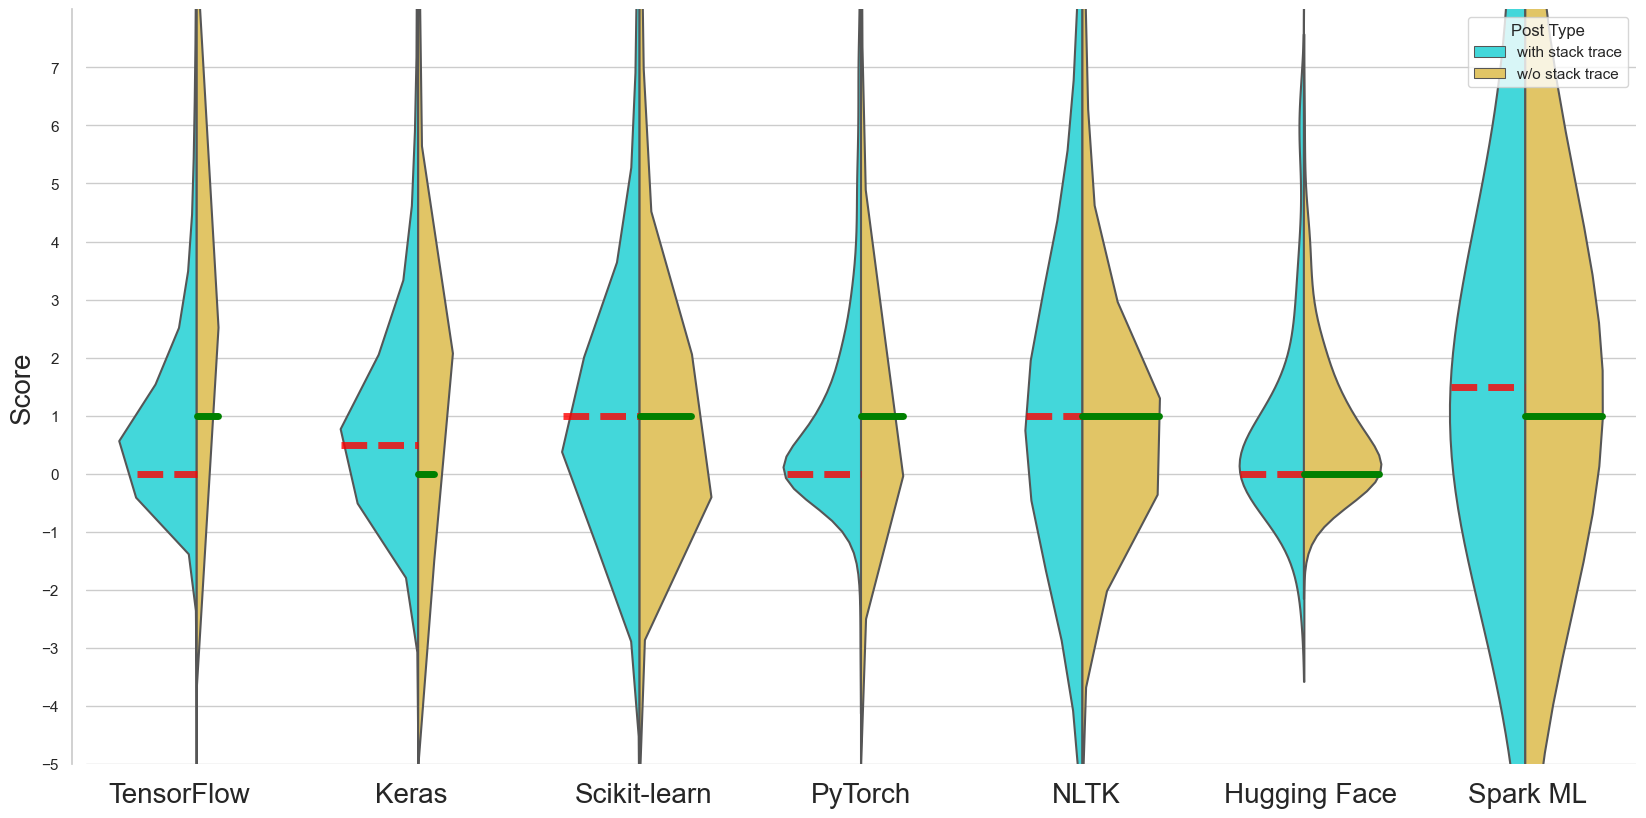

In [59]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.06, 0.21, 0.36, 0.50, 0.645, 0.79, 0.93]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

    
sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Score", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(-5, 8))
g2.set_yticks(np.arange(-5, 8, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('./Result/score.pdf')
plt.show()

In [60]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    0.0
Name: 50%, dtype: float64

In [61]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    1.0
Name: 50%, dtype: float64

In [62]:
tmp_w = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [63]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=71324308.0, pvalue=0.0014608156002971651)

In [64]:
tmp_w_nan.shape

(5436, 3)

In [65]:
tmp_wo_nan.shape

(26932, 3)

## Comment

In [66]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [67]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [68]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [69]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [70]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_df_hf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_hf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [71]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [72]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [73]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

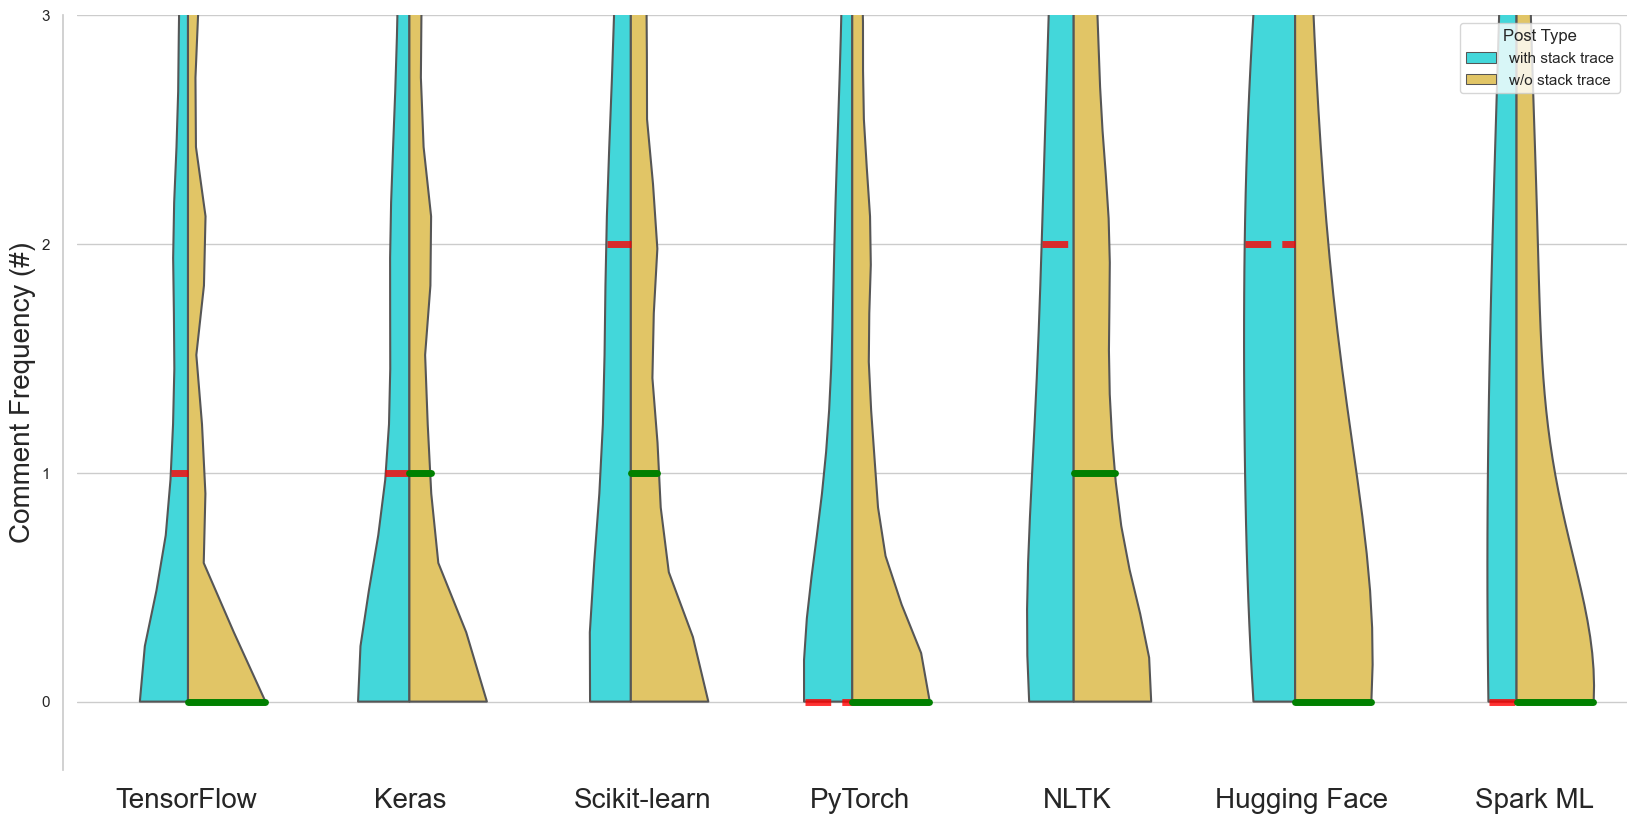

In [74]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Comment Frequency (#)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 3))
g2.set_ylim(bottom=-0.3)
g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('./Result/comment.pdf')
plt.show()

In [75]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    0.0
Name: 50%, dtype: float64

In [76]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    0.0
Name: 50%, dtype: float64

In [77]:
tmp_w = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [78]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=956.5, pvalue=0.5318231043421153)

In [79]:
tmp_w_nan.shape

(16, 3)

In [80]:
tmp_wo_nan.shape

(110, 3)

## View 

In [81]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [82]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [83]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [84]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [85]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_df_hf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_hf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [86]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [87]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [88]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

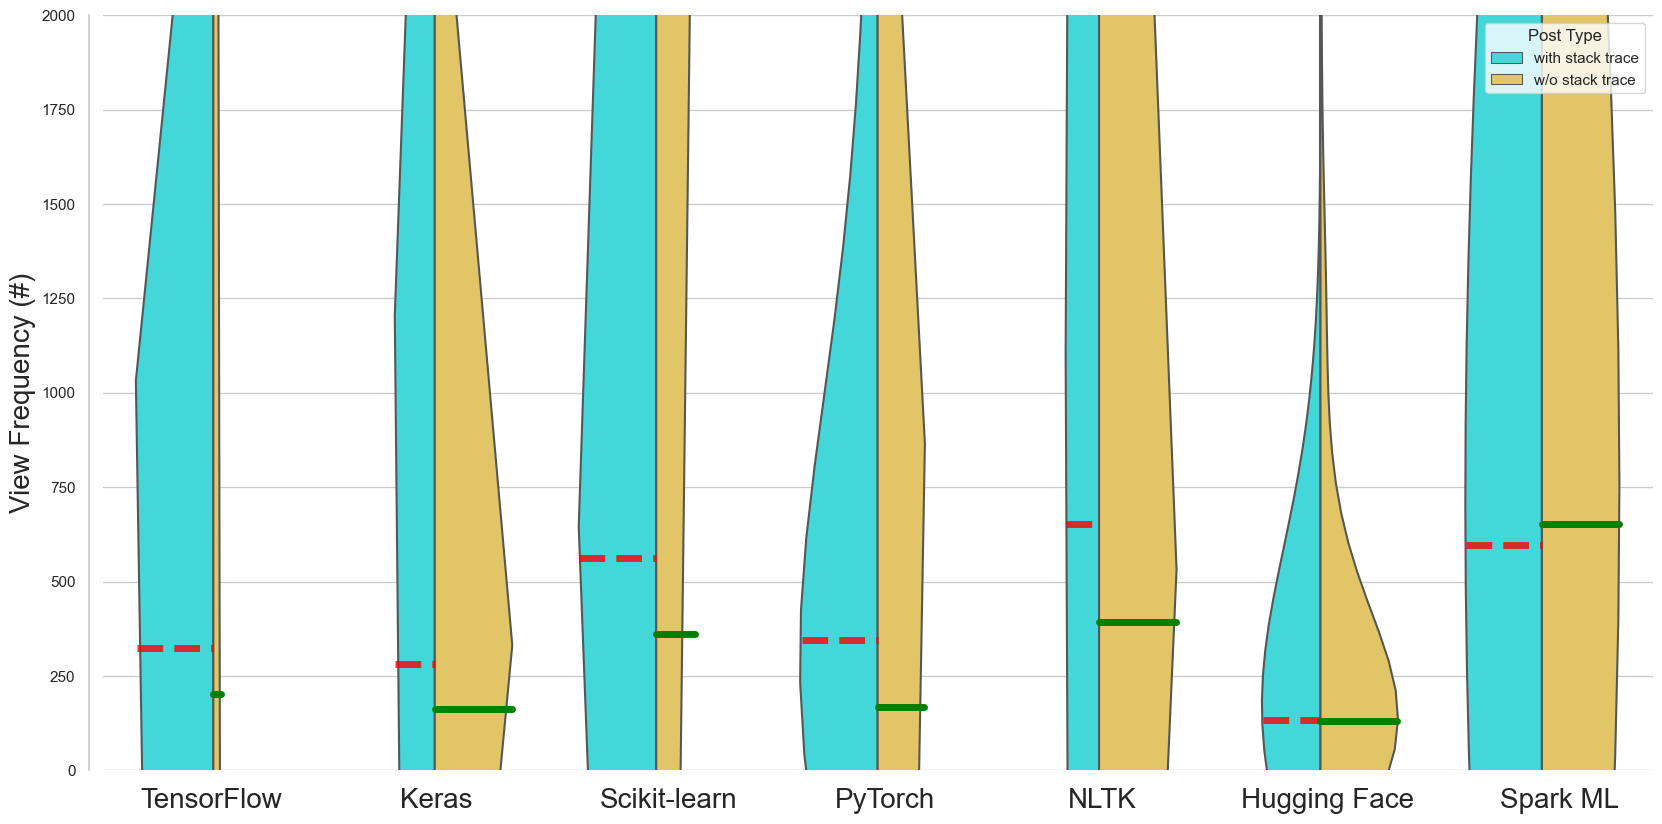

In [89]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("View Frequency (#)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 2000))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('./Result/view.pdf')
plt.show()

In [90]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    324.0
Name: 50%, dtype: float64

In [91]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    202.0
Name: 50%, dtype: float64

In [92]:
tmp_w = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [93]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=82660850.0, pvalue=3.287751072658961e-51)

In [94]:
tmp_w_nan.shape

(5436, 3)

In [95]:
tmp_wo_nan.shape

(26932, 3)

## Answer_count

In [96]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [97]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [98]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [99]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [100]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_df_hf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_hf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [101]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [102]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [103]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

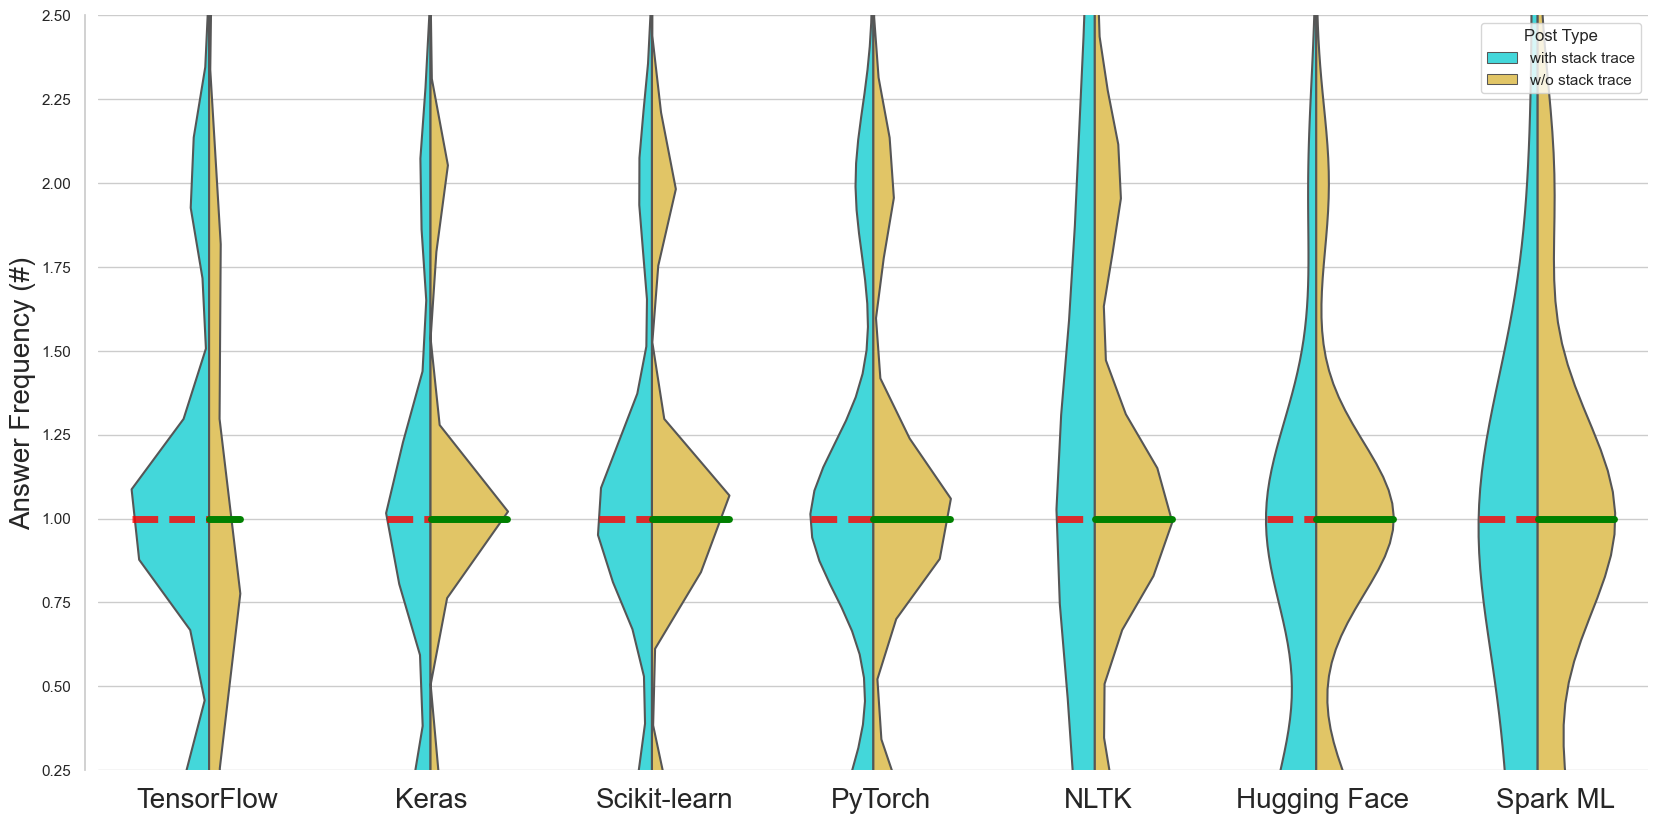

In [104]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Answer Frequency (#)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0.25, 2.5))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('./Result/answer_count.pdf')
plt.show()

In [105]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    1.0
Name: 50%, dtype: float64

In [106]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    1.0
Name: 50%, dtype: float64

In [107]:
tmp_w = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [108]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=861.5, pvalue=0.8800643782476305)

In [109]:
tmp_w_nan.shape

(16, 3)

In [110]:
tmp_wo_nan.shape

(110, 3)

## Q length

In [111]:
pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_hugh.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_keras.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_nltk.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_pt.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_sklearn.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_sp.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_ques_len_tf.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

In [112]:
df_tf['Type']      = df_tf.Type.apply(lambda x: ("TensorFlow", x))
df_keras['Type']   = df_keras.Type.apply(lambda x: ("Keras", x))
df_sklearn['Type'] = df_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
df_pt['Type']      = df_pt.Type.apply(lambda x: ("PyTorch", x))
df_nltk['Type']    = df_nltk.Type.apply(lambda x: ("NLTK", x))
df_hug['Type']     = df_hug.Type.apply(lambda x: ("Hugging Face", x))
df_sp['Type']      = df_sp.Type.apply(lambda x: ("Spark ML", x))

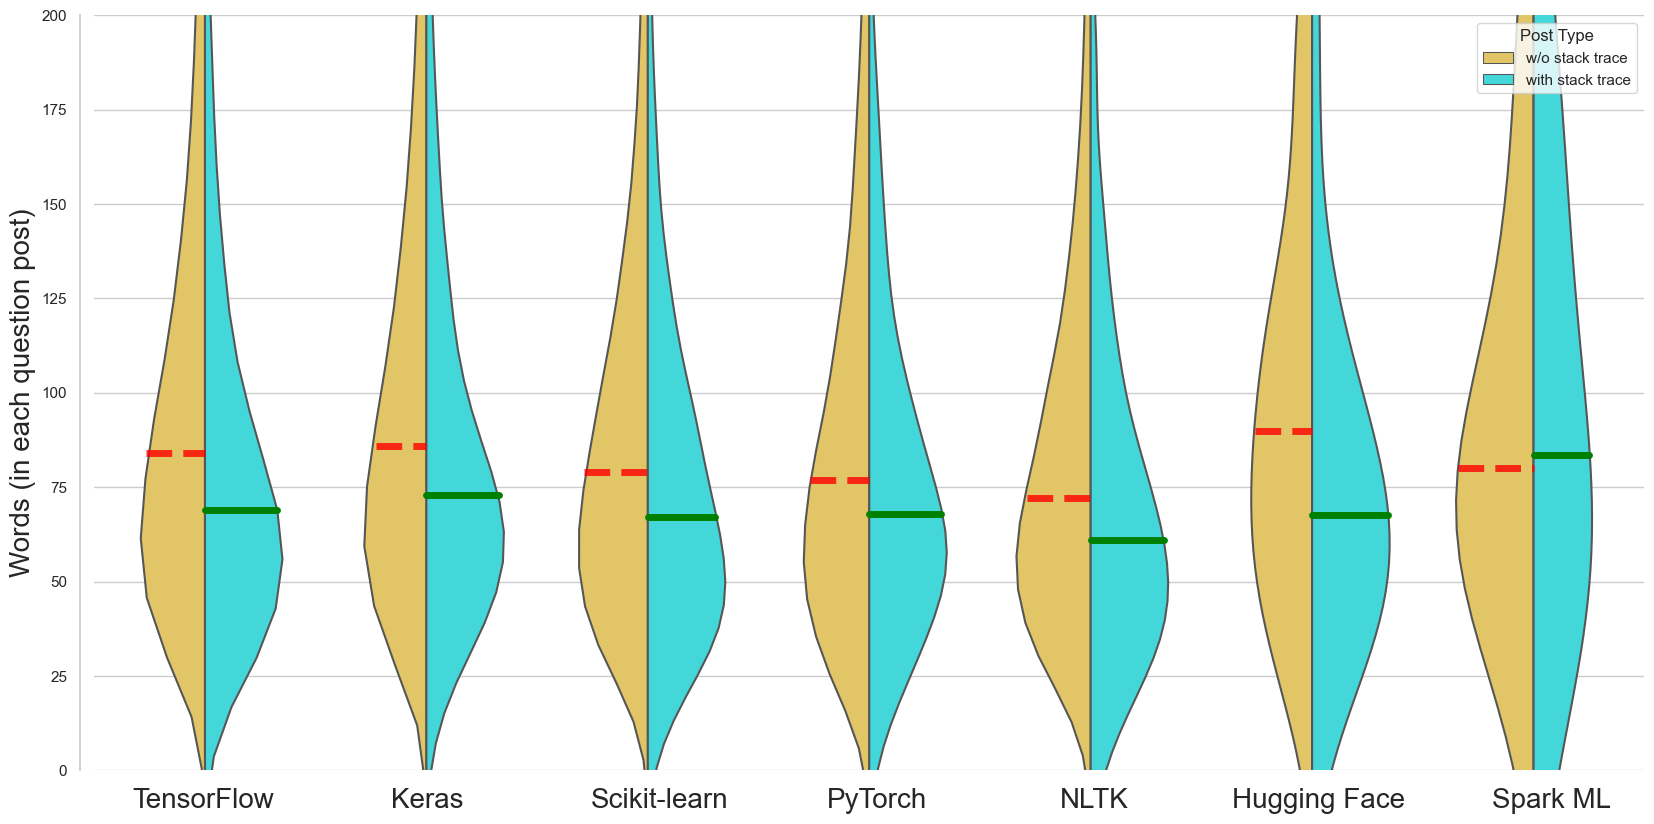

In [113]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([df_tf, df_keras, df_sklearn, df_pt, df_nltk, df_hug, df_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2 = sns.violinplot(x="Type", 
                   y="Words (in each question post)", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Words (in each question post)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 200))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('./Result/q_length.pdf')
plt.show()

In [114]:
ml = "Spark ML"

In [115]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Words (in each question post)    83.5
Name: 50%, dtype: float64

In [116]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Words (in each question post)    80.0
Name: 50%, dtype: float64

In [117]:
tmp_w = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Words (in each question post)'].isnull()]
tmp_wo = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Words (in each question post)'].isnull()]

In [118]:
mannwhitneyu(tmp_w_nan["Words (in each question post)"], tmp_wo_nan["Words (in each question post)"])

MannwhitneyuResult(statistic=1016.5, pvalue=0.917161227400691)

In [119]:
tmp_w_nan.shape

(16, 3)

In [120]:
tmp_wo_nan.shape

(125, 3)

## LOC

In [121]:
pure_data = working_directory_path + "./CSV_data/plt_df_loc_hugh.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_hug = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_loc_keras.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_keras = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_loc_nltk.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_nltk = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_loc_pt.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_pt = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_loc_sklearn.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_sklearn = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_loc_sp.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_sp = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "./CSV_data/plt_df_loc_tf.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_tf = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

In [122]:
df_loc_tf['Type']      = df_loc_tf.Type.apply(lambda x: ("TensorFlow", x))
df_loc_keras['Type']   = df_loc_keras.Type.apply(lambda x: ("Keras", x))
df_loc_sklearn['Type'] = df_loc_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
df_loc_pt['Type']      = df_loc_pt.Type.apply(lambda x: ("PyTorch", x))
df_loc_nltk['Type']    = df_loc_nltk.Type.apply(lambda x: ("NLTK", x))
df_loc_hug['Type']     = df_loc_hug.Type.apply(lambda x: ("Hugging Face", x))
df_loc_sp['Type']      = df_loc_sp.Type.apply(lambda x: ("Spark ML", x))

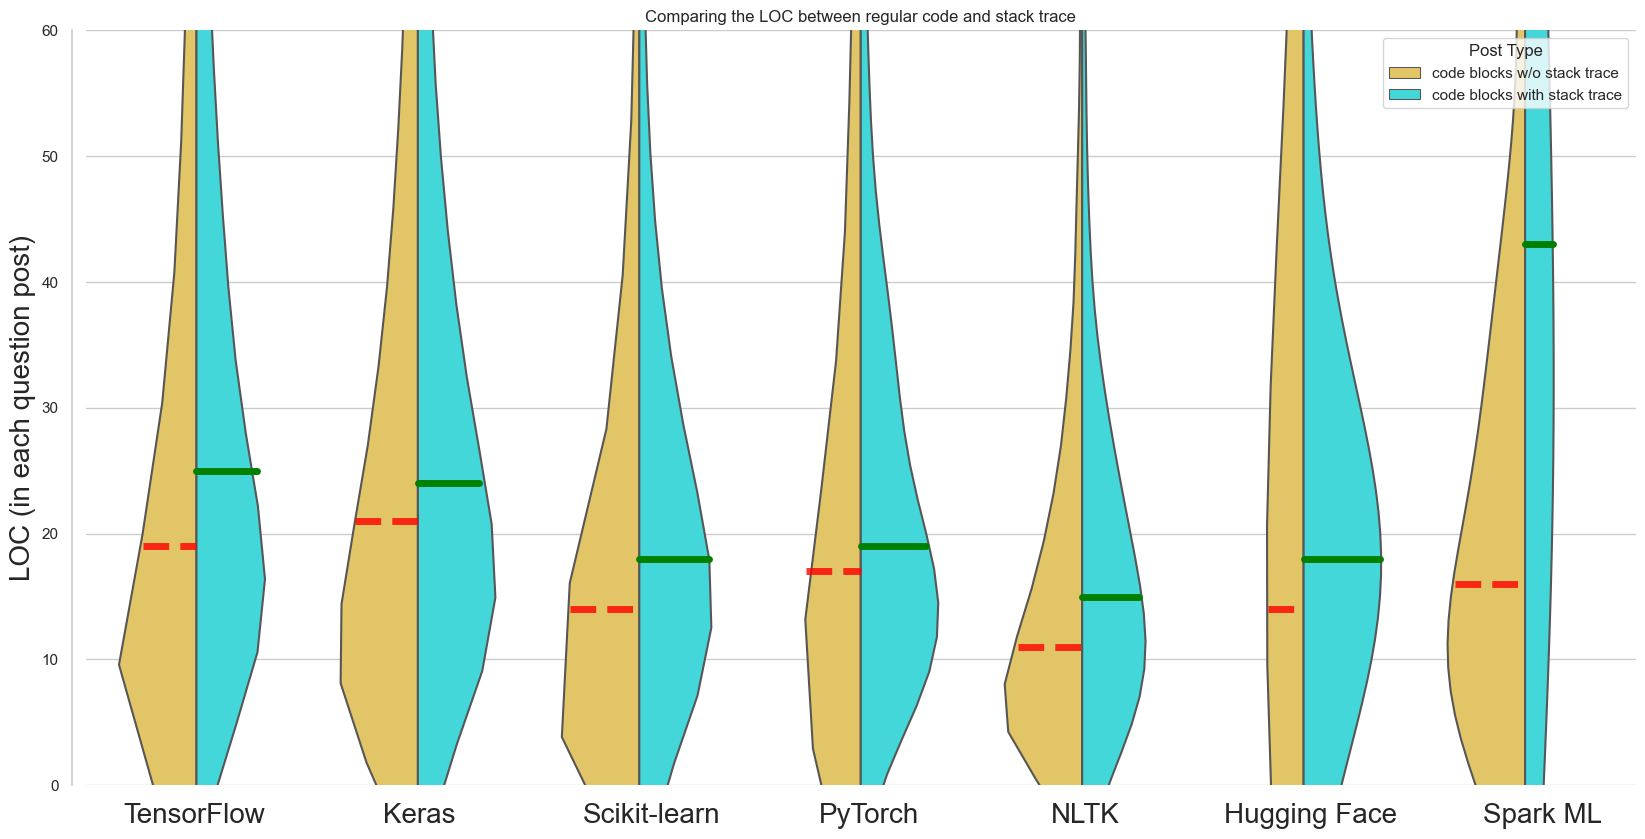

In [123]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([df_loc_tf, df_loc_keras, df_loc_sklearn, df_loc_pt, df_loc_nltk, df_loc_hug, df_loc_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2 = sns.violinplot(x="Type", 
                   y="LOC (in each question post)", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"code blocks with stack trace": "#2AEFF3", "code blocks w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
g2.set(title='Comparing the LOC between regular code and stack trace')
g2.set_ylabel("LOC (in each question post)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 60))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('./Result/loc.pdf')
plt.show()

In [124]:
ml = "TensorFlow"

In [125]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks with stack trace")].describe().iloc[5]

LOC (in each question post)    25.0
Name: 50%, dtype: float64

In [126]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks w/o stack trace")].describe().iloc[5]

LOC (in each question post)    19.0
Name: 50%, dtype: float64

In [127]:
tmp_w = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['LOC (in each question post)'].isnull()]
tmp_wo = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['LOC (in each question post)'].isnull()]

In [128]:
mannwhitneyu(tmp_w_nan["LOC (in each question post)"], tmp_wo_nan["LOC (in each question post)"])

MannwhitneyuResult(statistic=86631429.5, pvalue=2.2399516594006565e-101)

In [129]:
tmp_w_nan.shape

(5436, 3)

In [130]:
tmp_wo_nan.shape

(26932, 3)

# RQ2

Import all windows_size data

In [131]:
dic_hug_win     = pickle.load(open("./Pickle_data/dic_hugh_win.p", "rb"))
dic_keras_win   = pickle.load(open("./Pickle_data/dic_keras_win.p", "rb"))
dic_nltk_win    = pickle.load(open("./Pickle_data/dic_nltk_win.p", "rb"))
dic_pt_win      = pickle.load(open("./Pickle_data/dic_pt_win.p", "rb"))
dic_sklearn_win = pickle.load(open("./Pickle_data/dic_sklearn_win.p", "rb"))
dic_spark_win   = pickle.load(open("./Pickle_data/dic_sp_win.p", "rb"))
dic_tf_win      = pickle.load(open("./Pickle_data/dic_tf_win.p", "rb"))

Import all support data

In [132]:
dic_hug_sup     = pickle.load(open("./Pickle_data/dic_hugh_sup.p", "rb"))
dic_keras_sup   = pickle.load(open("./Pickle_data/dic_keras_sup.p", "rb"))
dic_nltk_sup    = pickle.load(open("./Pickle_data/dic_nltk_sup.p", "rb"))
dic_pt_sup      = pickle.load(open("./Pickle_data/dic_pt_sup.p", "rb"))
dic_sklearn_sup = pickle.load(open("./Pickle_data/dic_sklearn_sup.p", "rb"))
dic_spark_sup   = pickle.load(open("./Pickle_data/dic_sp_sup.p", "rb"))
dic_tf_sup      = pickle.load(open("./Pickle_data/dic_tf_sup.p", "rb"))

In [133]:
total_result_win_x = [dic_hug_win["x"],
                      dic_keras_win["x"], 
                      dic_nltk_win["x"], 
                      dic_pt_win["x"], 
                      dic_sklearn_win["x"], 
                      dic_spark_win["x"], 
                      dic_tf_win["x"]]

total_result_win_y = [dic_hug_win["y"],
                      dic_keras_win["y"], 
                      dic_nltk_win["y"], 
                      dic_pt_win["y"], 
                      dic_sklearn_win["y"], 
                      dic_spark_win["y"], 
                      dic_tf_win["y"]]

label = ["HuggingFace", "Keras", "NLTK", "PyTorch", "Scikit-learn", "Spark ML", "TensorFlow"]

# ax.plot(x,x,c='b',marker="^",ls='--',label='GNE',fillstyle='none')

my_style = [('k', "^", '--'), ('#1bd164', "+", '--'), ('#1D05F5', "*", '-'), ('r', "v", '-'), ('#A79FED', (8,2,0), '--'), ('#AD521D', "s", ':'), ('#FA496A', "d", 'dotted')]
# ValueError: ',' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'


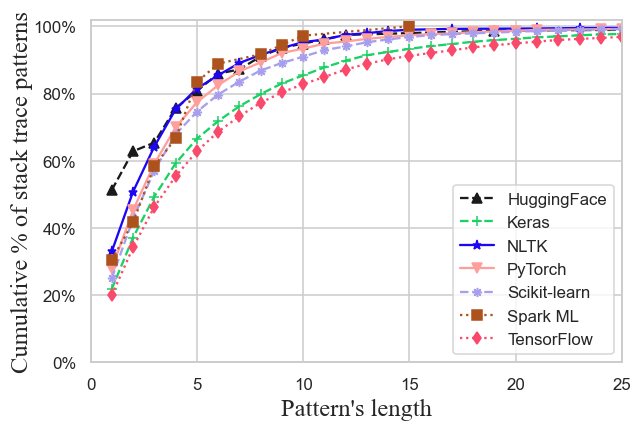

In [134]:
fig = plt.figure(figsize=(6, 4), dpi=110)
ax1 = fig.add_subplot(111)

plt_lst = []
for x, y, l, s in zip(total_result_win_x, total_result_win_y, label, my_style):
    plt_lst.append(ax1.plot(x, y, label=l, c=s[0], marker=s[1], ls=s[2]))
    
ax1.legend(loc='lower right')
ax1.set_xlabel('Pattern\'s length', fontproperties=font)
ax1.set_ylabel('Cumulative % of stack trace patterns', labelpad=0, fontproperties=font)
# ax1.set_title('RQ2')

ax1.axis(ymin=0, ymax=102)
ax1.axis(xmin=0, xmax=25)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(True)
fig.tight_layout()
plt.savefig('./Result/length_rq2.pdf')
plt.show()

In [135]:
total_result_sup_x = [dic_hug_sup["x"],
                      dic_keras_sup["x"], 
                      dic_nltk_sup["x"], 
                      dic_pt_sup["x"], 
                      dic_sklearn_sup["x"], 
                      dic_spark_sup["x"], 
                      dic_tf_sup["x"]]

total_result_sup_y = [dic_hug_sup["y"],
                      dic_keras_sup["y"], 
                      dic_nltk_sup["y"], 
                      dic_pt_sup["y"], 
                      dic_sklearn_sup["y"], 
                      dic_spark_sup["y"], 
                      dic_tf_sup["y"]]

label = ["HuggingFace", "Keras", "NLTK", "PyTorch", "Scikit-learn", "Spark ML", "TensorFlow"]
my_style = [('k', "^", '--'), ('#1bd164', "+", '--'), ('#1D05F5', "*", '-'), ('r', "v", '-'), ('#A79FED', (8,2,0), '--'), ('#AD521D', "s", ':'), ('#FA496A', "d", 'dotted')]

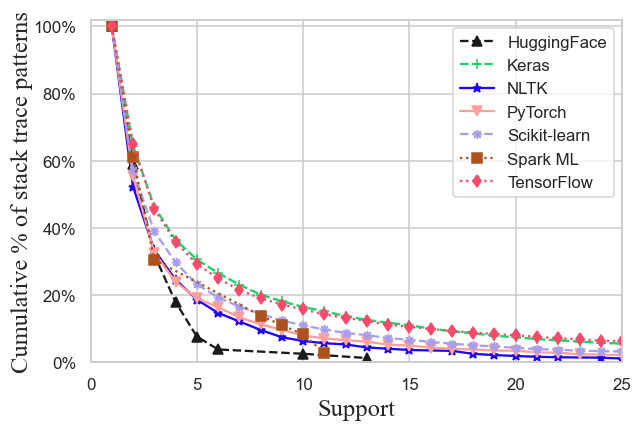

In [136]:
fig = plt.figure(figsize=(6, 4), dpi=110)
ax1 = fig.add_subplot(111)
# ax1.set_prop_cycle(marker_cycler)

plt_lst = []
for x, y, l, s in zip(total_result_sup_x, total_result_sup_y, label, my_style):
    plt_lst.append(ax1.plot(x, y, label=l, c=s[0], marker=s[1], ls=s[2]))
    
ax1.legend(loc='upper right')
ax1.set_xlabel('Support', fontproperties=font)
ax1.set_ylabel('Cumulative % of stack trace patterns', labelpad=0, fontproperties=font)

# ax1.set_title('RQ2')

ax1.axis(ymin=0, ymax=102)
ax1.axis(xmin=0, xmax=25)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(True)
fig.tight_layout()
plt.savefig('./Result/sup_rq2.pdf')
plt.show()

### Fine shared patterns between libraries and prepare Round 1 (The first quantitative study)

import data

In [137]:
lst_sp_pattern_w_sup      = pickle.load(open("./Pickle_data/sp_ccspan_2_result_pure.p", "rb"))
lst_hug_pattern_w_sup     = pickle.load(open("./Pickle_data/hug_ccspan_2_result_pure.p", "rb"))
lst_nltk_pattern_w_sup    = pickle.load(open("./Pickle_data/nltk_ccspan_2_result_pure.p", "rb"))
lst_pt_pattern_w_sup      = pickle.load(open("./Pickle_data/pt_ccspan_2_result_pure.p", "rb"))
lst_tf_pattern_w_sup      = pickle.load(open("./Pickle_data/tf_ccspan_2_result_pure.p", "rb"))
lst_keras_pattern_w_sup   = pickle.load(open("./Pickle_data/keras_ccspan_2_result_pure.p", "rb"))
lst_sklearn_pattern_w_sup = pickle.load(open("./Pickle_data/sklearn_ccspan_2_result_pure.p", "rb"))

double-checking for each list that has unique pattern

In [138]:
assert type(lst_sp_pattern_w_sup) == type(lst_hug_pattern_w_sup) == type(lst_nltk_pattern_w_sup) == type(lst_pt_pattern_w_sup) == type(lst_tf_pattern_w_sup) == type(lst_keras_pattern_w_sup) == type(lst_sklearn_pattern_w_sup), "All should be list!"

In [139]:
# lst_tf_pattern_w_sup[0]

In [140]:
def checker_patterns_are_unique(patt_lst: list) -> bool:
    higher_one = False
    pat_c_dic = Counter(patt_lst)
    for _, freq in pat_c_dic.items():
        if freq > 1: higher_one = True
    return higher_one

In [141]:
len(lst_sp_pattern_w_sup), len(lst_hug_pattern_w_sup), len(lst_nltk_pattern_w_sup), len(lst_pt_pattern_w_sup), len(lst_tf_pattern_w_sup), len(lst_keras_pattern_w_sup), len(lst_sklearn_pattern_w_sup)

(22, 46, 412, 578, 5927, 2824, 1640)

In [142]:
lst_sp_pattern_w_sup[0]

([51232624],
 2,
 (('worker', 'main'),
  ('worker', 'process'),
  ('serializers', 'dump_stream'),
  ('regression', '__init__'),
  ('__init__', '_convert_to_vector')))

In [143]:
def get_pattern_tup(lst_pattern_w_sup: list) -> list:
    '''Delete support from pattern tuples'''
    
    lst_pattern_wo_sup = []
    i = 0
    while i < len(lst_pattern_w_sup):
        # lst_pattern_wo_sup.append(list(lst_pattern_w_sup[i][1]))
        lst_pattern_wo_sup.append(lst_pattern_w_sup[i][2])
        i = i + 1

    return lst_pattern_wo_sup

In [144]:
lst_sp_pattern      = get_pattern_tup(lst_sp_pattern_w_sup)
lst_hug_pattern     = get_pattern_tup(lst_hug_pattern_w_sup)
lst_nltk_pattern    = get_pattern_tup(lst_nltk_pattern_w_sup)
lst_pt_pattern      = get_pattern_tup(lst_pt_pattern_w_sup)
lst_tf_pattern      = get_pattern_tup(lst_tf_pattern_w_sup)
lst_keras_pattern   = get_pattern_tup(lst_keras_pattern_w_sup)
lst_sklearn_pattern = get_pattern_tup(lst_sklearn_pattern_w_sup)

In [145]:
assert not checker_patterns_are_unique(lst_sp_pattern), "patterns in sp are not unique!"
assert not checker_patterns_are_unique(lst_hug_pattern), "patterns in hug are not unique!"
assert not checker_patterns_are_unique(lst_nltk_pattern), "patterns in nltk are not unique!"
assert not checker_patterns_are_unique(lst_pt_pattern), "patterns in are pt not unique!"
assert not checker_patterns_are_unique(lst_tf_pattern), "patterns in are tf not unique!"
assert not checker_patterns_are_unique(lst_keras_pattern), "patterns in keras are not unique!"
assert not checker_patterns_are_unique(lst_sklearn_pattern), "patterns in sklearn are not unique!"

In [146]:
print(lst_sklearn_pattern[-1])
print(lst_sklearn_pattern_w_sup[-1])

(('text', 'lambda'),)
([53920226, 41553652, 54669666, 48516633, 26367075, 28655889, 43106417, 40077084, 25599816, 43218685, 29980037, 21589177, 18432289, 43314707, 62693409, 43946259, 20831882, 39303912, 46034861, 58537609, 51497681, 45883679, 48772769, 50805257, 50628266, 53648001], 45, (('text', 'lambda'),))


In [147]:
concat_pattern = lst_sp_pattern + lst_hug_pattern + lst_nltk_pattern + lst_pt_pattern + lst_tf_pattern + lst_keras_pattern + lst_sklearn_pattern

In [148]:
assert len(concat_pattern) == len(lst_sp_pattern) + len(lst_hug_pattern) + len(lst_nltk_pattern) + len(lst_pt_pattern) + len(lst_tf_pattern) + len(lst_keras_pattern) + len(lst_sklearn_pattern), "Should be the same."

In [149]:
len(lst_sp_pattern), len(lst_hug_pattern), len(lst_nltk_pattern), len(lst_pt_pattern), len(lst_tf_pattern), len(lst_keras_pattern), len(lst_sklearn_pattern), "Total:", len(concat_pattern)

(22, 46, 412, 578, 5927, 2824, 1640, 'Total:', 11449)

In [150]:
concat_pattern[1405], len(concat_pattern)

((('training', 'train_and_evaluate'),
  ('training', 'run'),
  ('training', 'run_local'),
  ('estimator', 'train'),
  ('estimator', '_train_model'),
  ('estimator', '_train_model_default'),
  ('estimator', '_train_with_estimator_spec'),
  ('monitored_session', 'run'),
  ('monitored_session', 'run'),
  ('monitored_session', 'run'),
  ('six', 'reraise'),
  ('monitored_session', 'run'),
  ('monitored_session', 'run')),
 11449)

In [151]:
pattern_counter = Counter(concat_pattern)

In [152]:
pat_freq = []
for pattern, count in pattern_counter.items():
    pat_freq.append(count)
Counter(pat_freq)

Counter({1: 6248, 3: 145, 5: 20, 4: 47, 2: 2236, 6: 1})

Create DF for the plot

In [153]:
pattern_df = pd.DataFrame.from_dict(pattern_counter, orient='index').reset_index()
pattern_df = pattern_df.rename(columns={'index':'Pattern', 0:'Shared_lib_count'})

In [154]:
pattern_df

,Pattern,Shared_lib_count
0,"((worker, main), (worker, process), (serialize...",1
1,"((common, call), (common, callJavaFunc), (java...",1
2,"((wrapper, _fit), (wrapper, _fit_java), (java_...",1
3,"((pipeline, fit), (wrapper, _fit), (wrapper, _...",1
4,"((dataframe, show), (java_gateway, __call__), ...",1
...,...,...
8692,"((base, fit_predict),)",1
8693,"((arpack, eigsh),)",1
8694,"((openml, _get_json_content_from_openml_api),)",1
8695,"((text, fit),)",1


In [155]:
pattern_df.groupby(['Shared_lib_count'])['Shared_lib_count'].count()

Shared_lib_count
1    6248
2    2236
3     145
4      47
5      20
6       1
Name: Shared_lib_count, dtype: int64

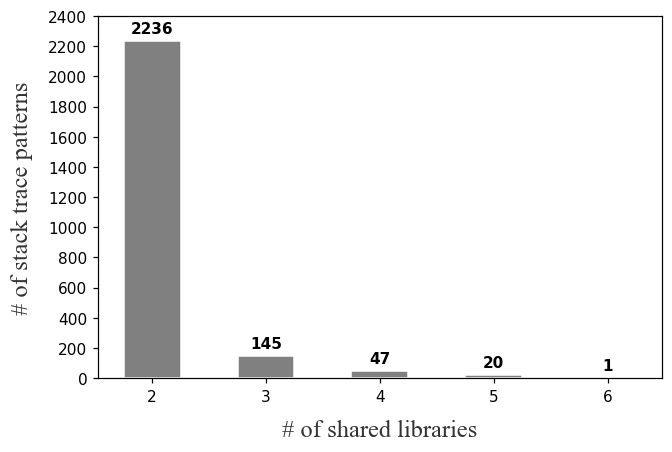

In [316]:
num_shared_lib = [2236, 145, 47, 20, 1]
shared_lib = [2, 3, 4, 5, 6]

fig, ax = plt.subplots(figsize=(6, 4), dpi=110, constrained_layout=True)

rects2 = ax.bar(shared_lib, num_shared_lib, hatch="", color="gray", edgecolor='w', width=0.5)

ax.set_xlabel('# of shared libraries', labelpad=10, color='#333333', fontproperties=font)
ax.set_ylabel('# of stack trace patterns', labelpad=10, color='#333333', fontproperties=font)

ax.set_xticks(np.arange(2, 7, 1))
ax.set_yticks(np.arange(0, 2500, 200))


ax.bar_label(rects2, padding=3, weight='bold')
# ax.grid(axis = 'y')

# fig.tight_layout()
plt.savefig('./Result/shared_rq2.pdf')
plt.show()

### Find shared pattern 2D

In [157]:
sp_pattern_df = pd.DataFrame(lst_sp_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
sp_pattern_df["Library"] = "Spark ML"

tf_pattern_df = pd.DataFrame(lst_tf_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
tf_pattern_df["Library"] = "Tensorflow"

nltk_pattern_df = pd.DataFrame(lst_nltk_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
nltk_pattern_df["Library"] = "NLTK"

keras_pattern_df = pd.DataFrame(lst_keras_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
keras_pattern_df["Library"] = "Keras"

pt_pattern_df = pd.DataFrame(lst_pt_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
pt_pattern_df["Library"] = "PyTorch"

sklearn_pattern_df = pd.DataFrame(lst_sklearn_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
sklearn_pattern_df["Library"] = "Sklearn"

hug_pattern_df = pd.DataFrame(lst_hug_pattern_w_sup, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
hug_pattern_df["Library"] = "Hugging Face"

libs_pattern_df = pd.concat([sp_pattern_df, tf_pattern_df, nltk_pattern_df, keras_pattern_df, pt_pattern_df, sklearn_pattern_df, hug_pattern_df], ignore_index=True)

In [158]:
libs_pattern_df

,Q_id_lst,Support,Pattern_esp,Library
0,[51232624],2,"((worker, main), (worker, process), (serialize...",Spark ML
1,"[49729510, 40366588]",2,"((common, call), (common, callJavaFunc), (java...",Spark ML
2,"[37260902, 54219826]",2,"((wrapper, _fit), (wrapper, _fit_java), (java_...",Spark ML
3,"[32714825, 37260902]",2,"((pipeline, fit), (wrapper, _fit), (wrapper, _...",Spark ML
4,"[54776007, 46257819]",2,"((dataframe, show), (java_gateway, __call__), ...",Spark ML
...,...,...,...,...
11444,"[65023526, 64044200, 65082609]",10,"((module, _call_impl),)",Hugging Face
11445,"[63465109, 64626722, 64406166]",5,"((__init__, module),)",Hugging Face
11446,[62772819],3,"((threading, wait),)",Hugging Face
11447,"[60459292, 64180517, 63232732, 64180606, 58454...",13,"((module, __call__),)",Hugging Face


In [159]:
pattern_df["shared_lib"] = np.nan

In [160]:
pd_tmp = pd.merge(pattern_df, libs_pattern_df, how='left',left_on=['Pattern'],right_on=['Pattern_esp']).reset_index(drop=True)

In [161]:
pd_tmp["shared_lib"] = pd_tmp.apply(lambda x: (x.Library, x.Support, x.Q_id_lst), axis=1)

In [162]:
pattern_df_w_lib = pd_tmp.groupby(["Pattern", "Shared_lib_count"], dropna=False)["shared_lib"].agg(list).reset_index()

In [163]:
# pattern_df_w_lib = pattern_df_w_lib[pattern_df_w_lib.shared_lib != 0].reset_index(drop=True)

In [164]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 10000)
pattern_df_w_lib.head()

,Pattern,Shared_lib_count,shared_lib
0,"((.., module),)",2,"[(Tensorflow, 2, [53531820, 53531820]), (Keras, 2, [53531820, 53531820])]"
1,"((...document, context),)",1,"[(NLTK, 2, [14503441])]"
2,"((ANN, module), (__init__, module), (__init__, module))",1,"[(Tensorflow, 2, [64533007])]"
3,"((AdaGrad, module),)",1,"[(Tensorflow, 2, [53151522])]"
4,"((AlexNet_test, module), (app, run), (AlexNet_test, main), (AlexNet_test, evaluate))",1,"[(Tensorflow, 2, [44581910])]"


In [165]:
def get_library_lst(total_lst: list) -> list:
    lib_list = []
    for item in total_lst:
        lib_list.append((item[0], item[1]))
    return lib_list

def get_q_id_set(total_lst: list) -> list:
    q_id_set = set()
    for item in total_lst:
        q_id_set.update(item[2])
    return q_id_set

def get_q_id_url(q_id_set: set) -> list:
    random.seed(100)
    url_lst = []
    q_id_lst = []
    
    if len(q_id_set) > 5: 
        random_q_id = random.sample(tuple(q_id_set), k=5)
    else:
        random_q_id = q_id_set
    for item in random_q_id:
        _link = "https://stackoverflow.com/questions/" + str(item)
        url_lst.append(_link)
    return url_lst

In [166]:
pattern_df_w_lib["Lib_set"] = pattern_df_w_lib.apply(lambda row: get_library_lst(row.shared_lib), axis=1)
pattern_df_w_lib["Q_id_set"] = pattern_df_w_lib.apply(lambda row: get_q_id_set(row.shared_lib), axis=1)
pattern_df_w_lib["Rand_5_urls"] = pattern_df_w_lib.apply(lambda row: get_q_id_url(row.Q_id_set), axis=1)

In [167]:
pattern_df_w_lib.head(1)

,Pattern,Shared_lib_count,shared_lib,Lib_set,Q_id_set,Rand_5_urls
0,"((.., module),)",2,"[(Tensorflow, 2, [53531820, 53531820]), (Keras, 2, [53531820, 53531820])]","[(Tensorflow, 2), (Keras, 2)]",{53531820},[https://stackoverflow.com/questions/53531820]


In [168]:
with pd.ExcelWriter('./Excel_data/shared_lib.xlsx') as writer:
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 2].to_excel(writer, sheet_name='two')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 3].to_excel(writer, sheet_name='three')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 4].to_excel(writer, sheet_name='four')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 5].to_excel(writer, sheet_name='five')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 6].to_excel(writer, sheet_name='six')

In [169]:
# Generate URLs columns
for index in range(1, 6):
    col_string = "URL_" + str(index)
    pattern_df_w_lib[col_string] = np.nan
for index in pattern_df_w_lib.index:
    _c = 1
    for item in pattern_df_w_lib.loc[index, "Rand_5_urls"]:
        col_string = "URL_" + str(_c)
        pattern_df_w_lib.loc[index, col_string] = item
        _c += 1

In [170]:
emperical_study = pattern_df_w_lib[(pattern_df_w_lib.Shared_lib_count != 1) & (pattern_df_w_lib.Shared_lib_count != 2)].copy()

In [171]:
# Shuffle the DF
emperical_study = emperical_study.sample(frac=1).reset_index(drop=True)

In [172]:
sorted_emperical_study = emperical_study.sort_values(by=['Shared_lib_count'], ascending=False)

In [173]:
sorted_emperical_study.reset_index(drop=True, inplace=True)

In [174]:
sorted_emperical_study.drop("Rand_5_urls", axis=1, inplace=True)

In [175]:
sorted_emperical_study.shape

(213, 10)

In [176]:
sorted_emperical_study["Prof_Li_label"] = str()
sorted_emperical_study["Prof_Max_label"] = str()
sorted_emperical_study["Amin_label"] = str()

In [177]:
sorted_emperical_study.loc[sorted_emperical_study.index.to_series().sample(frac=0.3).index, 'Partition'] = '1'

In [178]:
sorted_emperical_study['Partition'].fillna('2',inplace=True)

In [179]:
sorted_emperical_study.Partition.value_counts()

2    149
1     64
Name: Partition, dtype: int64

In [180]:
sorted_emperical_study = sorted_emperical_study.sort_values(by=['Partition'], ascending=True)

In [181]:
with pd.ExcelWriter('./Excel_data/shared_lib.xlsx') as writer:
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 2].to_excel(writer, sheet_name='two')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 3].to_excel(writer, sheet_name='three')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 4].to_excel(writer, sheet_name='four')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 5].to_excel(writer, sheet_name='five')
    pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 6].to_excel(writer, sheet_name='six')
    sorted_emperical_study.to_excel(writer, sheet_name='Emperical_study_wo_2')

In [182]:
def checker(lib_count: int, lib_list: list) -> None:
    if len(lib_list) != lib_count:
        print("Error!: ", lib_count, lib_list)

In [183]:
_ = pattern_df_w_lib.apply(lambda row: checker(row.Shared_lib_count, row.shared_lib), axis=1)

In [184]:
pattern_df_w_lib["Spark ML"] = 0.0
pattern_df_w_lib["Tensorflow"] = 0.0
pattern_df_w_lib["NLTK"] = 0.0
pattern_df_w_lib["Keras"] = 0.0
pattern_df_w_lib["PyTorch"] = 0.0
pattern_df_w_lib["Sklearn"] = 0.0
pattern_df_w_lib["Hugging Face"] = 0.0

In [185]:
def extend_libraries(row: pd.Series) -> pd.Series:
    for lib_tuple in row["shared_lib"]:
        # print(lib_tuple[0])
        if lib_tuple[0] == "Spark ML":
            row["Spark ML"] += 1
        elif lib_tuple[0] == "Tensorflow":
            row["Tensorflow"] += 1
        elif lib_tuple[0] == "NLTK":
            row["NLTK"] += 1
        elif lib_tuple[0] == "Keras":
            row["Keras"] += 1
        elif lib_tuple[0] == "PyTorch":
            row["PyTorch"] += 1
        elif lib_tuple[0] == "Sklearn":
            row["Sklearn"] += 1
        elif lib_tuple[0] == "Hugging Face":
            row["Hugging Face"] += 1
        else:
            print("Error (100)!")
    return row

In [186]:
pattern_df_w_lib_new = pattern_df_w_lib.apply(lambda row: extend_libraries(row), axis=1)

In [187]:
pattern_df_w_lib_new.head()

,Pattern,Shared_lib_count,shared_lib,Lib_set,Q_id_set,Rand_5_urls,URL_1,URL_2,URL_3,URL_4,URL_5,Spark ML,Tensorflow,NLTK,Keras,PyTorch,Sklearn,Hugging Face
0,"((.., module),)",2,"[(Tensorflow, 2, [53531820, 53531820]), (Keras, 2, [53531820, 53531820])]","[(Tensorflow, 2), (Keras, 2)]",{53531820},[https://stackoverflow.com/questions/53531820],https://stackoverflow.com/questions/53531820,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,"((...document, context),)",1,"[(NLTK, 2, [14503441])]","[(NLTK, 2)]",{14503441},[https://stackoverflow.com/questions/14503441],https://stackoverflow.com/questions/14503441,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"((ANN, module), (__init__, module), (__init__, module))",1,"[(Tensorflow, 2, [64533007])]","[(Tensorflow, 2)]",{64533007},[https://stackoverflow.com/questions/64533007],https://stackoverflow.com/questions/64533007,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"((AdaGrad, module),)",1,"[(Tensorflow, 2, [53151522])]","[(Tensorflow, 2)]",{53151522},[https://stackoverflow.com/questions/53151522],https://stackoverflow.com/questions/53151522,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,"((AlexNet_test, module), (app, run), (AlexNet_test, main), (AlexNet_test, evaluate))",1,"[(Tensorflow, 2, [44581910])]","[(Tensorflow, 2)]",{44581910},[https://stackoverflow.com/questions/44581910],https://stackoverflow.com/questions/44581910,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# pattern_df_w_lib_new.groupby(["Shared_lib_count", "Spark ML", "Tensorflow", "NLTK", "Keras", "PyTorch", "Sklearn", "Hugging Face"]).sum()

In [189]:
pattern_df_w_lib_new2 = pattern_df_w_lib_new.groupby(["Shared_lib_count"]).sum()

In [190]:
pattern_df_w_lib_new2["Frequency"] = pattern_df.groupby(['Shared_lib_count'])['Shared_lib_count'].count()

In [191]:
pattern_df_w_lib_new2

,Spark ML,Tensorflow,NLTK,Keras,PyTorch,Sklearn,Hugging Face,Frequency
Shared_lib_count,,,,,,,,
1,16.0,3573.0,345.0,529.0,428.0,1345.0,12.0,6248
2,2.0,2147.0,25.0,2096.0,62.0,121.0,19.0,2236
3,2.0,139.0,14.0,133.0,29.0,110.0,8.0,145
4,1.0,47.0,10.0,45.0,39.0,43.0,3.0,47
5,1.0,20.0,17.0,20.0,19.0,20.0,3.0,20
6,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [192]:
pattern_df_w_lib_new2 = pattern_df_w_lib_new2.reset_index()

In [193]:
pattern_df.groupby(['Shared_lib_count'])['Shared_lib_count'].count()

Shared_lib_count
1    6248
2    2236
3     145
4      47
5      20
6       1
Name: Shared_lib_count, dtype: int64

In [194]:
def get_stacked_bar_per(row: pd.Series) -> pd.Series:
    shared_num = row["Shared_lib_count"]    
    row["Spark ML"]   = float(row["Spark ML"]/shared_num)
    row["Tensorflow"] = float(row["Tensorflow"]/shared_num)
    row["NLTK"]       = float(row["NLTK"]/shared_num)
    row["Keras"]      = float(row["Keras"]/shared_num)
    row["PyTorch"]    = float(row["PyTorch"]/shared_num)
    row["Sklearn"]    = float(row["Sklearn"]/shared_num)
    row["Hugging Face"] = float(row["Hugging Face"]/shared_num)
    
    return row

In [195]:
pattern_df_w_lib_new3 = pattern_df_w_lib_new2.apply(lambda row: get_stacked_bar_per(row), axis=1)

In [196]:
pattern_df_w_lib_new3

,Shared_lib_count,Spark ML,Tensorflow,NLTK,Keras,PyTorch,Sklearn,Hugging Face,Frequency
0,1.0,16.000000,3573.000000,345.000000,529.000000,428.000000,1345.000000,12.000000,6248.0
1,2.0,1.000000,1073.500000,12.500000,1048.000000,31.000000,60.500000,9.500000,2236.0
2,3.0,0.666667,46.333333,4.666667,44.333333,9.666667,36.666667,2.666667,145.0
3,4.0,0.250000,11.750000,2.500000,11.250000,9.750000,10.750000,0.750000,47.0
4,5.0,0.200000,4.000000,3.400000,4.000000,3.800000,4.000000,0.600000,20.0
5,6.0,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0


In [197]:
pattern_df_w_lib_new3['Shared_lib_count'] = pattern_df_w_lib_new3['Shared_lib_count'].astype('int')
pattern_df_w_lib_new3['Frequency'] = pattern_df_w_lib_new3['Frequency'].astype('int')
pattern_df_w_lib_new3 = pattern_df_w_lib_new3.set_index('Shared_lib_count')

In [198]:
pattern_df_w_lib_new4 = pattern_df_w_lib_new3.drop("Frequency", axis=1)

In [199]:
pattern_df_w_lib_new5 = pattern_df_w_lib_new4.drop(labels=1, axis=0)
pattern_df_w_lib_new5

,Spark ML,Tensorflow,NLTK,Keras,PyTorch,Sklearn,Hugging Face
Shared_lib_count,,,,,,,
2,1.000000,1073.500000,12.500000,1048.000000,31.000000,60.500000,9.500000
3,0.666667,46.333333,4.666667,44.333333,9.666667,36.666667,2.666667
4,0.250000,11.750000,2.500000,11.250000,9.750000,10.750000,0.750000
5,0.200000,4.000000,3.400000,4.000000,3.800000,4.000000,0.600000
6,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [200]:
# pattern_df_w_lib_new5.plot(kind='bar', stacked=True)

In [201]:
pattern_df_w_lib_new5

,Spark ML,Tensorflow,NLTK,Keras,PyTorch,Sklearn,Hugging Face
Shared_lib_count,,,,,,,
2,1.000000,1073.500000,12.500000,1048.000000,31.000000,60.500000,9.500000
3,0.666667,46.333333,4.666667,44.333333,9.666667,36.666667,2.666667
4,0.250000,11.750000,2.500000,11.250000,9.750000,10.750000,0.750000
5,0.200000,4.000000,3.400000,4.000000,3.800000,4.000000,0.600000
6,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


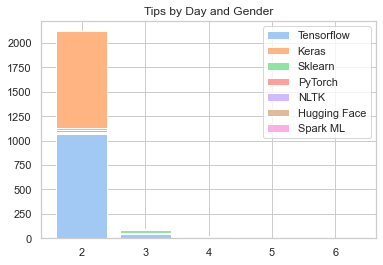

In [202]:
fig, ax = plt.subplots()

ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['Tensorflow'], label='Tensorflow')
ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['Keras'], bottom=pattern_df_w_lib_new5['Tensorflow'], label='Keras')
ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['Sklearn'], bottom=pattern_df_w_lib_new5['Tensorflow'], label='Sklearn')
ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['PyTorch'], bottom=pattern_df_w_lib_new5['Tensorflow'], label='PyTorch')
ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['NLTK'], bottom=pattern_df_w_lib_new5['Tensorflow'], label='NLTK')
ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['Hugging Face'], bottom=pattern_df_w_lib_new5['Tensorflow'], label='Hugging Face')
ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5['Spark ML'], bottom=pattern_df_w_lib_new5['Tensorflow'], label='Spark ML')

ax.set_title('Tips by Day and Gender')
ax.legend()

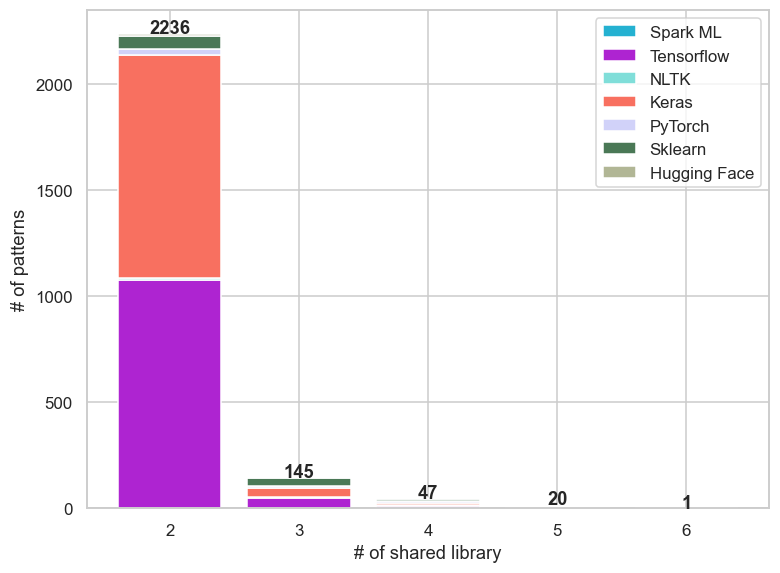

In [203]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=110)

colors = ['#24b1d1', '#ae24d1', '#80DED9', '#F87060', '#D1D2F9', '#4A7856', '#B1B695']
bottom = np.zeros(len(pattern_df_w_lib_new5))

for i, col in enumerate(pattern_df_w_lib_new5.columns):
    ax.bar(pattern_df_w_lib_new5.index, pattern_df_w_lib_new5[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(pattern_df_w_lib_new5[col])

totals = pattern_df_w_lib_new5.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + .5*y_offset, round(total), ha='center', weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.
# for bar in ax.patches:
#     ax.text(
#       # Put the text in the middle of each bar. get_x returns the start
#       # so we add half the width to get to the middle.
#       bar.get_x() + bar.get_width() / 2,
#       # Vertically, add the height of the bar to the start of the bar,
#       # along with the offset.
#       bar.get_height() + bar.get_y() + y_offset,
#       # This is actual value we'll show.
#       round(bar.get_height()),
#       # Center the labels and style them a bit.
#       ha='center',
#       color='w',
#       weight='bold',
#       size=8
#     )

plt.legend()
# plt.title('Intermediate Students Pass %')
plt.xlabel('# of shared library')
plt.ylabel('# of patterns')

plt.show()

In [204]:
def get_library_set(lib_set: set) -> set:
    pure_lib_set = set()
    for item in lib_set:
        pure_lib_set.add(item[0])
    return pure_lib_set

In [205]:
pattern_df_w_lib["Pure_lib_set"] = pattern_df_w_lib["Lib_set"].apply(lambda row: get_library_set(row))

In [206]:
pattern_df_w_lib_shared_2 = pattern_df_w_lib[pattern_df_w_lib.Shared_lib_count == 2]

In [207]:
pattern_df_w_lib_shared_2.Pure_lib_set.value_counts()

{Keras, Tensorflow}           2044
{Keras, Sklearn}                50
{Sklearn, Tensorflow}           49
{PyTorch, Tensorflow}           41
{Sklearn, NLTK}                 17
{PyTorch, Hugging Face}         15
{NLTK, Tensorflow}               8
{PyTorch, Sklearn}               4
{Tensorflow, Hugging Face}       3
{Keras, PyTorch}                 2
{Tensorflow, Spark ML}           2
{Sklearn, Hugging Face}          1
Name: Pure_lib_set, dtype: int64

In [208]:
heatmap_label = ["TensorFlow", "Keras", "Scikit-learn", "PyTorch", "NLTK", "Hugging Face", "Spark ML"]

In [209]:
heatmap_data = np.zeros((7, 7))

In [210]:
#{Tensorflow, Keras}           2044
heatmap_data[0][1] = 2044
heatmap_data[1][0] = 2044
# {Sklearn, Keras}                50
heatmap_data[2][1] = 50
heatmap_data[1][2] = 50
# {Tensorflow, Sklearn}           49
heatmap_data[0][2] = 49
heatmap_data[2][0] = 49
# {Tensorflow, PyTorch}           41
heatmap_data[0][3] = 41
heatmap_data[3][0] = 41
# {NLTK, Sklearn}                 17
heatmap_data[4][2] = 17
heatmap_data[2][4] = 17
# {Hugging Face, PyTorch}         15
heatmap_data[5][3] = 15
heatmap_data[3][5] = 15
# {NLTK, Tensorflow}               8
heatmap_data[4][0] = 8
heatmap_data[0][4] = 8
# {Sklearn, PyTorch}               4
heatmap_data[2][3] = 4
heatmap_data[3][2] = 4
# {Hugging Face, Tensorflow}       3
heatmap_data[5][0] = 3
heatmap_data[0][5] = 3
# {Keras, PyTorch}                 2
heatmap_data[1][3] = 2
heatmap_data[3][1] = 2
# {Spark ML, Tensorflow}           2
heatmap_data[6][0] = 2
heatmap_data[0][6] = 2
# {Hugging Face, Sklearn}          1
heatmap_data[5][2] = 1
heatmap_data[2][5] = 1

heatmap_data[0][0] = 1
heatmap_data[1][1] = 1
heatmap_data[2][2] = 1
heatmap_data[3][3] = 1
heatmap_data[4][4] = 1
heatmap_data[5][5] = 1
heatmap_data[6][6] = 1

In [211]:
heatmap_data

array([[1.000e+00, 2.044e+03, 4.900e+01, 4.100e+01, 8.000e+00, 3.000e+00,
        2.000e+00],
       [2.044e+03, 1.000e+00, 5.000e+01, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.900e+01, 5.000e+01, 1.000e+00, 4.000e+00, 1.700e+01, 1.000e+00,
        0.000e+00],
       [4.100e+01, 2.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.500e+01,
        0.000e+00],
       [8.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 0.000e+00, 1.000e+00, 1.500e+01, 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]])

In [212]:
data = pd.DataFrame(heatmap_data, columns=heatmap_label, index=heatmap_label)
df = pd.pivot_table(data=data, index=heatmap_label)
df.head()

,,,,,,
TensorFlow,Keras,Scikit-learn,PyTorch,NLTK,Hugging Face,Spark ML
1.0,2044.0,49.0,41.0,8.0,3.0,2.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0
3.0,0.0,1.0,15.0,0.0,1.0,0.0
8.0,0.0,17.0,0.0,1.0,0.0,0.0
41.0,2.0,4.0,1.0,0.0,15.0,0.0


In [213]:
mask = np.zeros(data.shape)
mask[0, 0] = 1
mask[1, 1] = 1
mask[2, 2] = 1
mask[3, 3] = 1
mask[4, 4] = 1
mask[5, 5] = 1
mask[6, 6] = 1

mask[np.triu_indices_from(mask)] = True

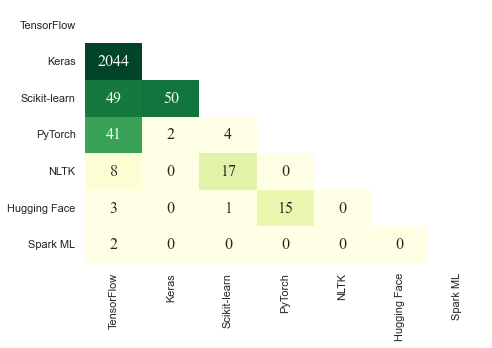

In [214]:
# sns.set()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(data, cmap='YlGn', robust=True, 
                annot=True, mask=mask, square=False, 
                cbar=False, annot_kws={'size':16, 'fontname':'Times New Roman'}, 
                fmt=".0f", 
                # linewidths=0.01,
                vmin=5, vmax=60, 
                linecolor="#222",
                    )

# plt.title("Heatmap Data")
plt.tight_layout()
plt.savefig('./Result/heat_3_rq2.pdf')
plt.show()

### Find pattern reduction when changing support from 1 to 2

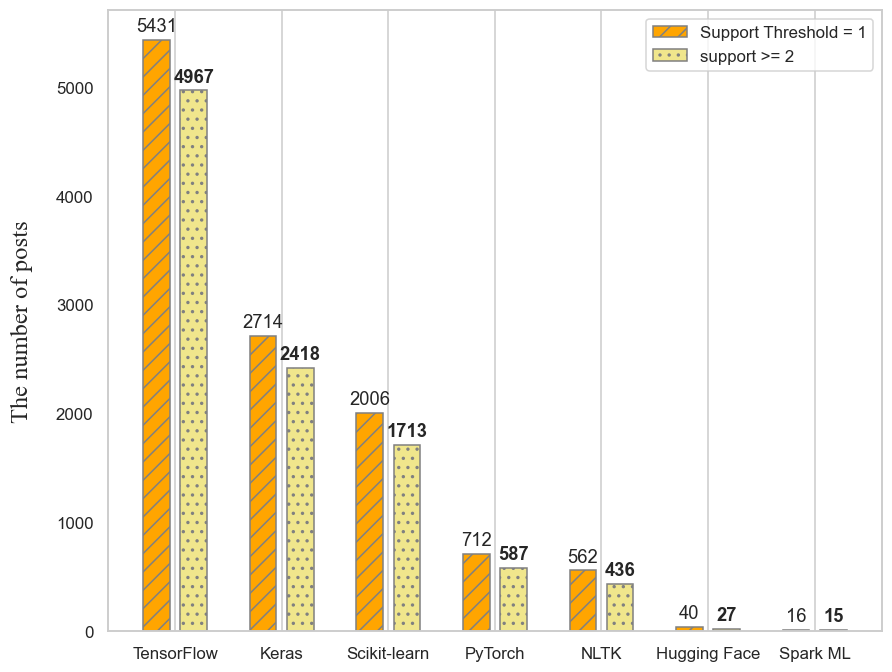

In [215]:
labels = ["TensorFlow", "Keras", "Scikit-learn", "PyTorch", "NLTK", "Hugging Face", "Spark ML"]
sup_threshold_1 = [5431, 2714, 2006, 712, 562, 40, 16]
sup_threshold_2 = [4967, 2418, 1713, 587, 436, 27, 15]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6), dpi=110, constrained_layout=True)

rects1 = ax.bar(x - (width/2 + 0.05), sup_threshold_1, width, label='Support Threshold = 1', hatch="//", color="orange", edgecolor='gray')
rects2 = ax.bar(x + (width/2 + 0.05), sup_threshold_2, width, label='support >= 2', hatch="..", color="khaki", edgecolor='gray')

for container, hatch in zip(ax.containers, ("//", "..")):
    for patch in container.patches:
        patch.set_hatch(hatch)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('The number of posts', labelpad=15, fontproperties=font)
# ax.set_xlabel('Scores')
# ax.set_title('Changes of covered questions when we altered the support threshold')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3, weight='bold')

ax.grid(axis = 'y')

# fig.tight_layout()
plt.savefig('./Result/dif_thre_rq1.pdf')
plt.show()

In [216]:
pat_min_result_2_sp      = pickle.load(open("./Pickle_data/sp_ccspan_2_result_pure.p", "rb"))
pat_min_result_2_hug     = pickle.load(open("./Pickle_data/hug_ccspan_2_result_pure.p", "rb"))
pat_min_result_2_nltk    = pickle.load(open("./Pickle_data/nltk_ccspan_2_result_pure.p", "rb"))
pat_min_result_2_pt      = pickle.load(open("./Pickle_data/pt_ccspan_2_result_pure.p", "rb"))
pat_min_result_2_tf      = pickle.load(open("./Pickle_data/tf_ccspan_2_result_pure.p", "rb"))
pat_min_result_2_keras   = pickle.load(open("./Pickle_data/keras_ccspan_2_result_pure.p", "rb"))
pat_min_result_2_sklearn = pickle.load(open("./Pickle_data/sklearn_ccspan_2_result_pure.p", "rb"))

In [217]:
len(pat_min_result_2_sp), len(pat_min_result_2_hug), len(pat_min_result_2_nltk), len(pat_min_result_2_pt), len(pat_min_result_2_tf), len(pat_min_result_2_keras), len(pat_min_result_2_sklearn)

(22, 46, 412, 578, 5927, 2824, 1640)

In [218]:
pat_min_result_1_sp      = pickle.load(open("./Pickle_data/sp_ccspan_1_result_pure.p", "rb"))
pat_min_result_1_hug     = pickle.load(open("./Pickle_data/hug_ccspan_1_result_pure.p", "rb"))
pat_min_result_1_nltk    = pickle.load(open("./Pickle_data/nltk_ccspan_1_result_pure.p", "rb"))
pat_min_result_1_pt      = pickle.load(open("./Pickle_data/pt_ccspan_1_result_pure.p", "rb"))
pat_min_result_1_tf      = pickle.load(open("./Pickle_data/tf_ccspan_1_result_pure.p", "rb"))
pat_min_result_1_keras   = pickle.load(open("./Pickle_data/keras_ccspan_1_result_pure.p", "rb"))
pat_min_result_1_sklearn = pickle.load(open("./Pickle_data/sklearn_ccspan_1_result_pure.p", "rb"))

In [219]:
len(pat_min_result_1_sp), len(pat_min_result_1_hug), len(pat_min_result_1_nltk), len(pat_min_result_1_pt), len(pat_min_result_1_tf), len(pat_min_result_1_keras), len(pat_min_result_1_sklearn)

(22, 78, 788, 1043, 9124, 4383, 2872)

In [220]:
print("sp -", "support_1:", len(pat_min_result_1_sp), ", support_2:", len(pat_min_result_2_sp), " Maintain:", "{:.2f}".format(len(pat_min_result_2_sp)*100/len(pat_min_result_1_sp)), "%")
print("hug -", "support_1:", len(pat_min_result_1_hug), ", support_2:", len(pat_min_result_2_hug), " Maintain:", "{:.2f}".format(len(pat_min_result_2_hug)*100/len(pat_min_result_1_hug)), "%")
print("nltk -", "support_1:", len(pat_min_result_1_nltk), ", support_2:", len(pat_min_result_2_nltk), " Maintain:", "{:.2f}".format(len(pat_min_result_2_nltk)*100/len(pat_min_result_1_nltk)), "%")
print("pt -", "support_1:", len(pat_min_result_1_pt), ", support_2:", len(pat_min_result_2_pt), " Maintain:", "{:.2f}".format(len(pat_min_result_2_pt)*100/len(pat_min_result_1_pt)), "%")
print("tf -", "support_1:", len(pat_min_result_1_tf), ", support_2:", len(pat_min_result_2_tf), " Maintain:", "{:.2f}".format(len(pat_min_result_2_tf)*100/len(pat_min_result_1_tf)), "%")
print("keras -", "support_1:", len(pat_min_result_1_keras), ", support_2:", len(pat_min_result_2_keras), " Maintain:", "{:.2f}".format(len(pat_min_result_2_keras)*100/len(pat_min_result_1_keras)), "%")
print("sklearn -", "support_1:", len(pat_min_result_1_sklearn), ", support_2:", len(pat_min_result_2_sklearn), " Maintain:", "{:.2f}".format(len(pat_min_result_2_sklearn)*100/len(pat_min_result_1_sklearn)), "%")

sp - support_1: 22 , support_2: 22  Maintain: 100.00 %
hug - support_1: 78 , support_2: 46  Maintain: 58.97 %
nltk - support_1: 788 , support_2: 412  Maintain: 52.28 %
pt - support_1: 1043 , support_2: 578  Maintain: 55.42 %
tf - support_1: 9124 , support_2: 5927  Maintain: 64.96 %
keras - support_1: 4383 , support_2: 2824  Maintain: 64.43 %
sklearn - support_1: 2872 , support_2: 1640  Maintain: 57.10 %


### Respose time trend

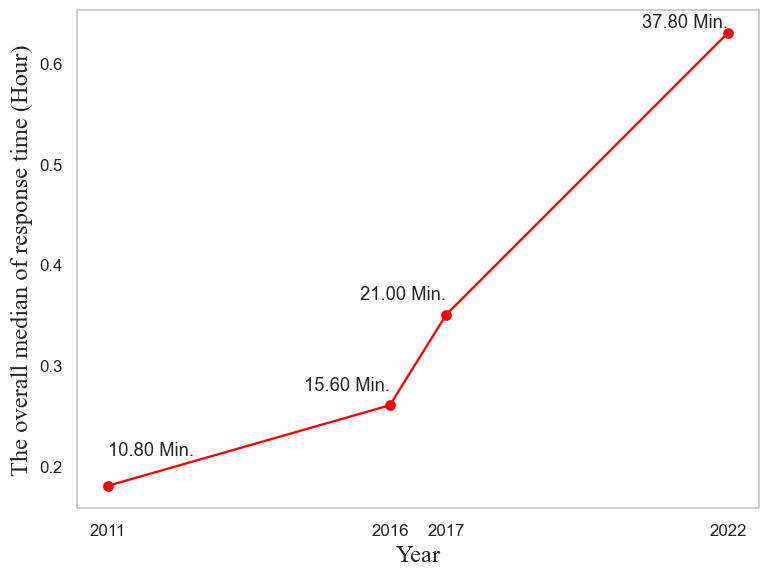

In [221]:
Data = {'Year': [2011, 2016, 2017, 2022],
        'Response_time': [0.18, 0.26, 0.35, 0.63]}
df = pd.DataFrame(Data,columns=['Year','Response_time'])

fig, ax = plt.subplots(figsize=(8, 6), dpi=110)
plt.plot(df['Year'], df['Response_time'], color='red', marker='o')

for index, row in df.iterrows():
    label = "{:.2f} Min.".format(row["Response_time"]*60)
    ha = "right"
    y = 10
    if index == 0: 
        ha = "left"
        y = 20
    elif index == 3:
        y = 4
    plt.annotate(label, (row["Year"], row["Response_time"]), textcoords="offset points", xytext=(0, y), ha=ha)

# plt.scatter(2020, 2.57)
# plt.text(2020, 0, "ML library w/o stack trace")

plt.xticks(df['Year'])
plt.xlabel('Year', fontproperties=font)
plt.ylabel('The overall median of response time (Hour)', fontproperties=font)

plt.grid(False)
plt.savefig('./Result/dif_res_ti_rq1.pdf')
plt.show()
# https://meta.stackexchange.com/questions/61301/statistics-what-is-the-average-response-time-on-stackoverflow
# Design lessons from the fastest Q&A site in the west
# Jun 23 2022
# Mined

### Find pattern statiscts support >=2 

In [222]:
sp_dic_sup      = pickle.load(open("./Pickle_data/plt_dic_sp_sup_rq1.p", "rb"))
hf_dic_sup      = pickle.load(open("./Pickle_data/plt_dic_hf_sup_rq1.p", "rb"))
nltk_dic_sup    = pickle.load(open("./Pickle_data/plt_dic_nltk_sup_rq1.p", "rb"))
pt_dic_sup      = pickle.load(open("./Pickle_data/plt_dic_pt_sup_rq1.p", "rb"))
tf_dic_sup      = pickle.load(open("./Pickle_data/plt_dic_tf_sup_rq1.p", "rb"))
keras_dic_sup   = pickle.load(open("./Pickle_data/plt_dic_keras_sup_rq1.p", "rb"))
sklearn_dic_sup = pickle.load(open("./Pickle_data/plt_dic_sklearn_sup_rq1.p", "rb"))

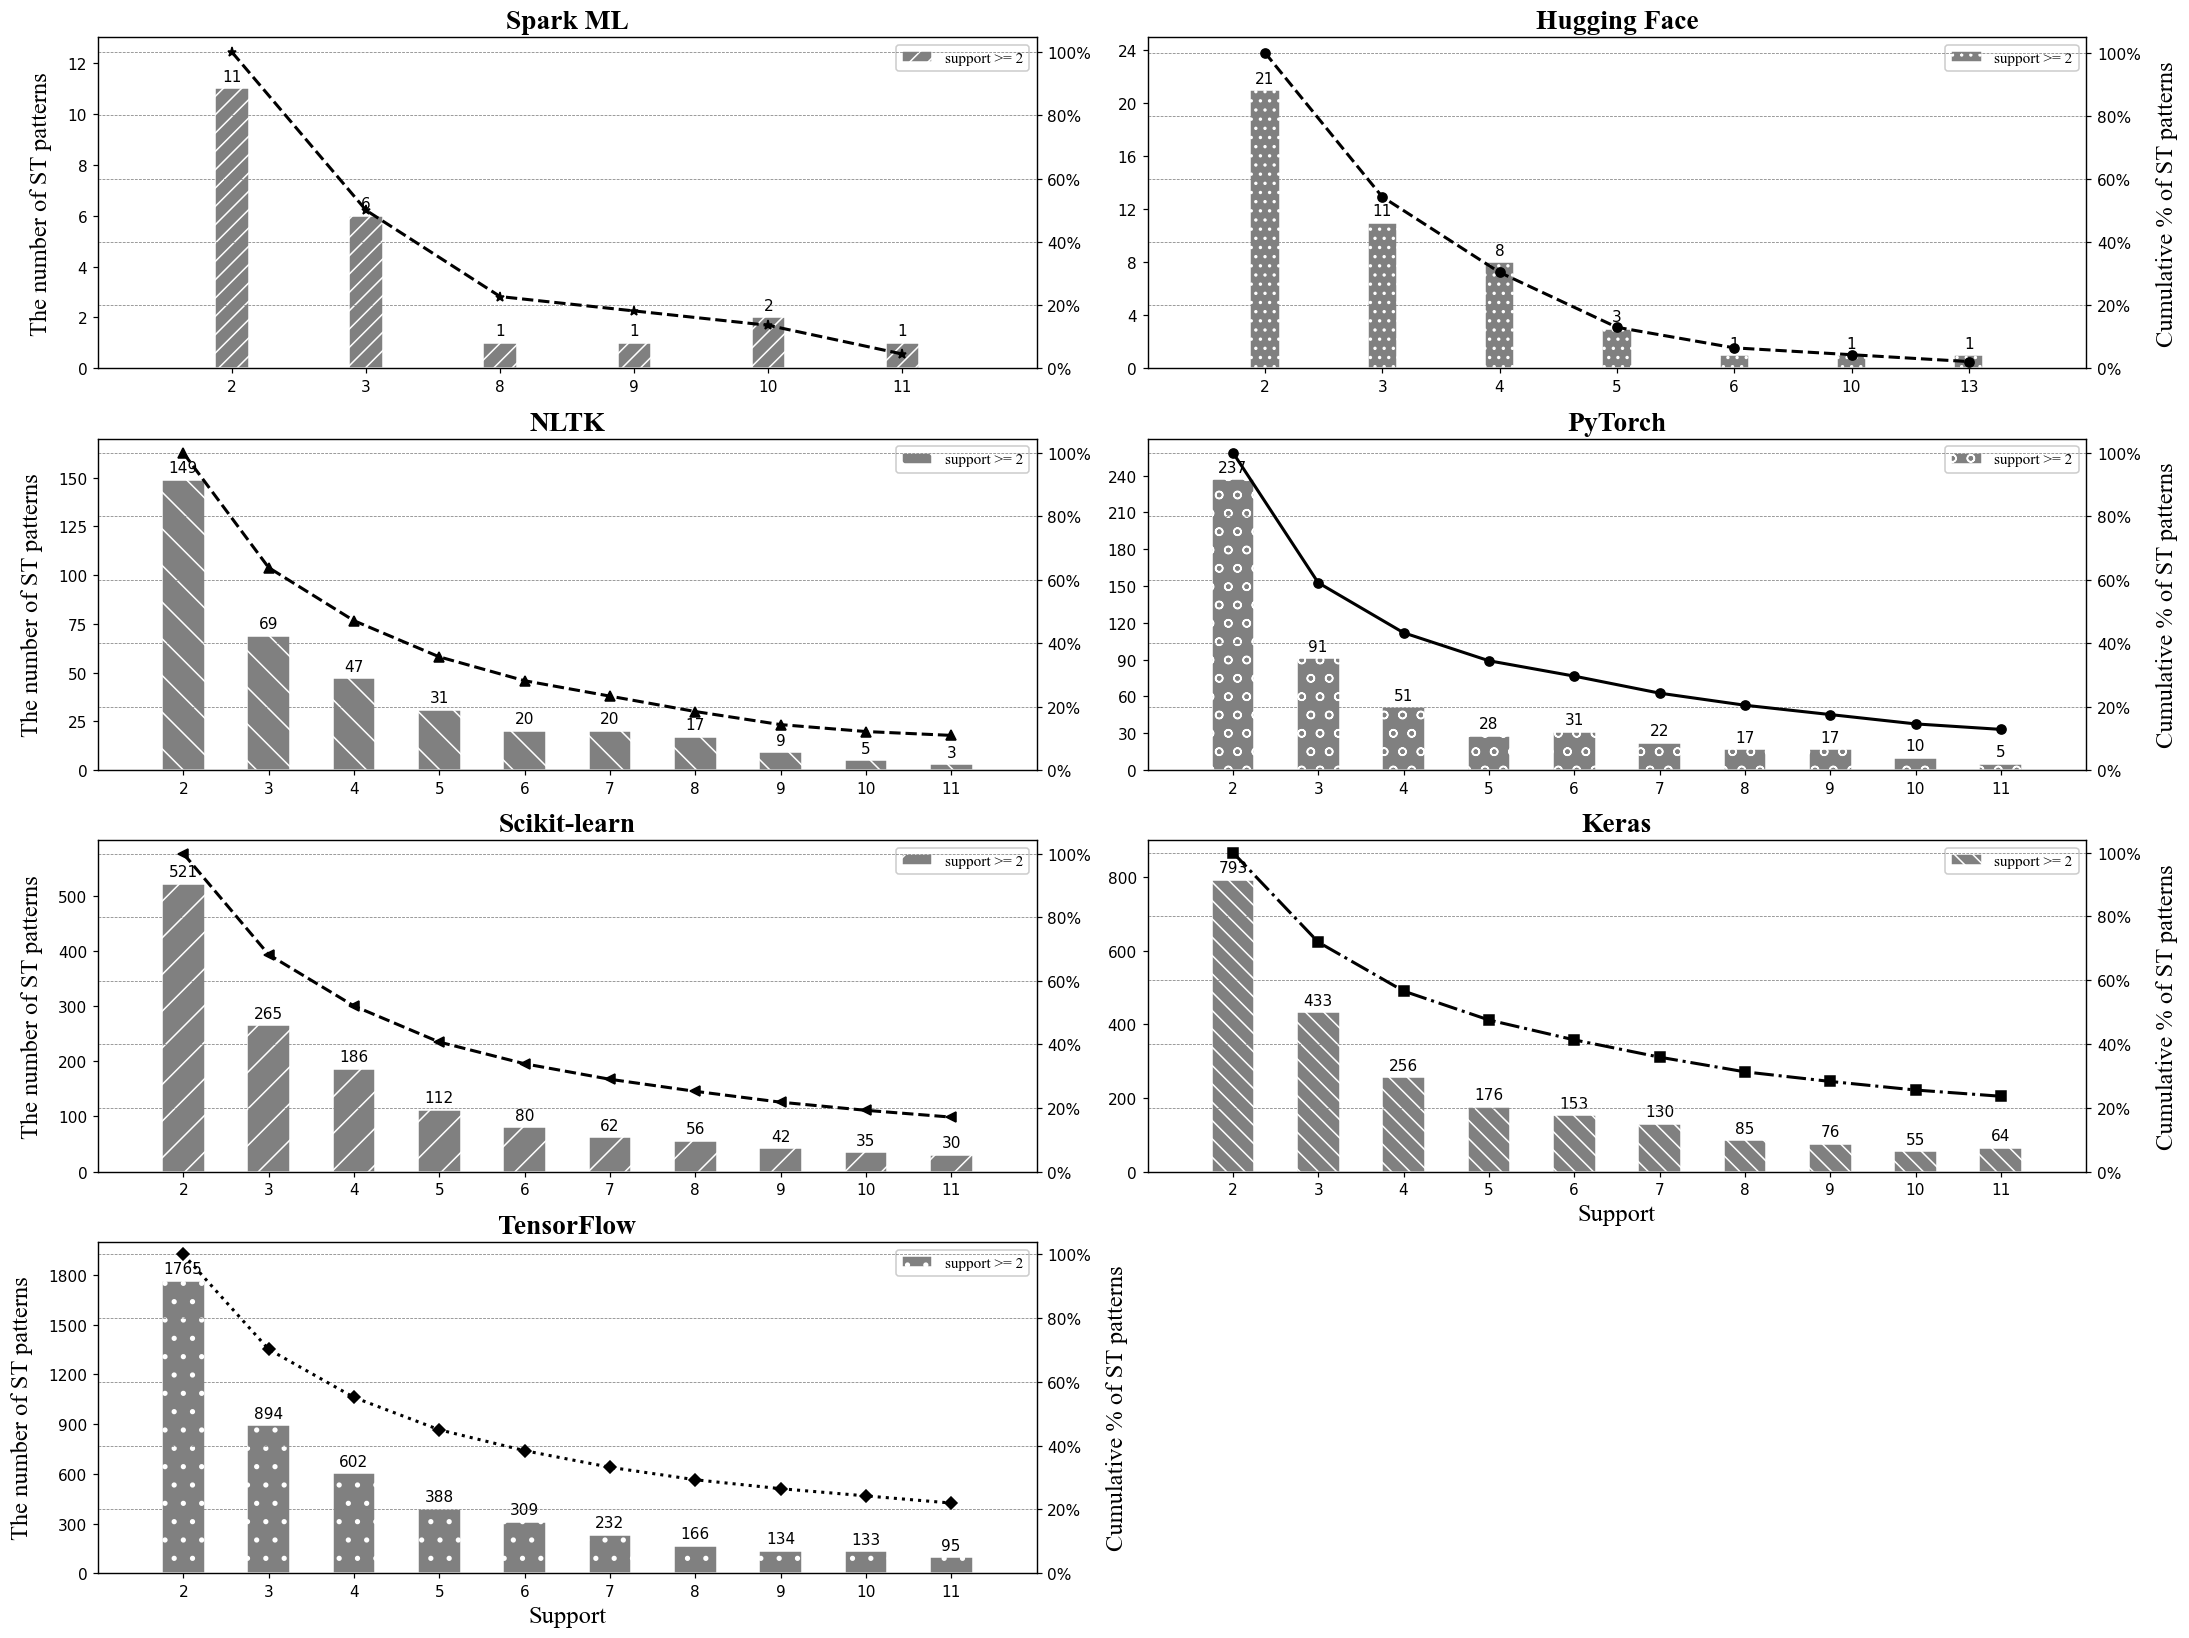

In [223]:
# plt.style.use('classic')
sns.set()
plt.style.use('default')

# creating grid for subplots
fig = plt.figure(figsize=(20, 15), dpi=110)

ax1 = plt.subplot2grid((4,2), (0, 0))
ax2 = plt.subplot2grid((4,2), (0, 1))
# ax3 = plt.subplot2grid((3,2), (1, 0), colspan=2)
ax3 = plt.subplot2grid((4,2), (1, 0))
ax4 = plt.subplot2grid((4,2), (1, 1))
ax5 = plt.subplot2grid((4,2), (2, 0))
ax6 = plt.subplot2grid((4,2), (2, 1))
ax7 = plt.subplot2grid((4,2), (3, 0))

# #################################### [ Spark ML ] ##############################################################

sup_x = sp_dic_sup["x"]
len_sup_y = sp_dic_sup["y1"]
per_len_sup_y = sp_dic_sup["y2"]

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax1.bar(sup_x, len_sup_y, width, label='support >= 2', hatch="//", color="gray", edgecolor='w')

ax1.set_title('Spark ML', fontname="Times New Roman", fontsize=18, weight='bold')
ax1.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax1.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax1.set_xticks(sup_x)
ax1.set_xlim([-1, len(sup_x)])

ax1.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax1.set_yticks(range(0, max(len_sup_y)+2, 2))
ax1.set_ylim(top=13)

ax1.bar_label(rects, padding=3)

axx = ax1.twinx()
plt.plot(sup_x, per_len_sup_y, '--*', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
# axx.set_ylabel('Cumulative % of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax1.grid(False)
ax1.set_facecolor('white')

# #################################### [ Hugging Face ] ###########################################################

sup_x = hf_dic_sup["x"]
len_sup_y = hf_dic_sup["y1"]
per_len_sup_y = hf_dic_sup["y2"]

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax2.bar(sup_x, len_sup_y, width, label='support >= 2', hatch="..", color="gray", edgecolor='w')

ax2.set_title('Hugging Face', fontname="Times New Roman", fontsize=18, weight='bold')
ax2.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax2.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax2.set_xticks(sup_x)
ax2.set_xlim([-1, len(sup_x)])

# ax2.set_ylabel('The number of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax2.set_yticks(range(0, max(len_sup_y)+4, 4))
ax2.set_ylim(top=25)

ax2.bar_label(rects, padding=3)

axx = ax2.twinx()
plt.plot(sup_x, per_len_sup_y, '--o', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax2.grid(False)
ax2.set_facecolor('white')

# #################################### [ NLTK ] ##############################################################

sup_x = nltk_dic_sup["x"]
len_sup_y = nltk_dic_sup["y1"]
per_len_sup_y = nltk_dic_sup["y2"]

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax3.bar(sup_x, len_sup_y, label='support >= 2', width=0.5, hatch="\\", color="gray", edgecolor='w')

ax3.set_title('NLTK', fontname="Times New Roman", fontsize=18, weight='bold')
ax3.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax[2].set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax3.set_xticks(sup_x)
ax3.set_xlim([-1, len(sup_x)])

ax3.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax3.set_yticks(range(0, max(len_sup_y)+10, 25))
ax3.set_ylim(top=170)

ax3.bar_label(rects, padding=3)

axx = ax3.twinx()
plt.plot(sup_x, per_len_sup_y, '--^', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
# axx.set_ylabel('Cumulative % of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax3.grid(False)
ax3.set_facecolor('white')

# #################################### [ PyTorch ] ##############################################################

sup_x = pt_dic_sup["x"]
len_sup_y = pt_dic_sup["y1"]
per_len_sup_y = pt_dic_sup["y2"]

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax4.bar(sup_x, len_sup_y, width=0.5, label='support >= 2', hatch="o", color="gray", edgecolor='w')

ax4.set_title('PyTorch', fontname="Times New Roman", fontsize=18, weight='bold')
ax4.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax4.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax4.set_xticks(sup_x)
ax4.set_xlim([-1, len(sup_x)])

# ax4.set_ylabel('The number of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax4.set_yticks(range(0, max(len_sup_y)+30, 30))
ax4.set_ylim(top=270)

ax4.bar_label(rects, padding=3)

axx = ax4.twinx()
plt.plot(sup_x, per_len_sup_y, '-o', color='black', label='PyTorch', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax4.grid(False)
ax4.set_facecolor('white')

# #################################### [ Sklearn ] ##############################################################

sup_x = sklearn_dic_sup["x"]
len_sup_y = sklearn_dic_sup["y1"]
per_len_sup_y = sklearn_dic_sup["y2"]

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax5.bar(sup_x, len_sup_y, label='support >= 2', width=0.5, hatch="/", color="gray", edgecolor='w')

ax5.set_title('Scikit-learn', fontname="Times New Roman", fontsize=18, weight='bold')
ax5.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax5.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax5.set_xticks(sup_x)
ax5.set_xticklabels(sup_x)
ax5.set_xlim([-1, len(sup_x)])

ax5.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax5.set_yticks(range(0, max(len_sup_y)+1, 100))
ax5.set_ylim(top=600)

ax5.bar_label(rects, padding=3)

axx = ax5.twinx()
plt.plot(sup_x, per_len_sup_y, '--<', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
# axx.set_ylabel('Cumulative % of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax5.grid(False)
ax5.set_facecolor('white')

# #################################### [ Keras ] ##############################################################

sup_x = keras_dic_sup["x"]
len_sup_y = keras_dic_sup["y1"]
per_len_sup_y = keras_dic_sup["y2"] 

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax6.bar(sup_x, len_sup_y, width=0.5, label='support >= 2', hatch='\\\\', color="gray", edgecolor='w')

ax6.set_title('Keras', fontname="Times New Roman", fontsize=18, weight='bold')
ax6.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

ax6.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax6.set_xticks(sup_x)
ax6.set_xlim([-1, len(sup_x)])

# ax6.set_ylabel('The number of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax6.set_yticks(range(0, max(len_sup_y)+100, 200))
ax6.set_ylim(top=900)

ax6.bar_label(rects, padding=3)

axx = ax6.twinx()
plt.plot(sup_x, per_len_sup_y, '-.s', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax6.grid(False)
ax6.set_facecolor('white')

# #################################### [ TensorFlow ] ##############################################################

sup_x = tf_dic_sup["x"]
len_sup_y = tf_dic_sup["y1"]
per_len_sup_y = tf_dic_sup["y2"]

# show just 10 elements on x-axis
sup_x = sup_x[:10]
len_sup_y = len_sup_y[:10]
per_len_sup_y = per_len_sup_y[:10]

rects = ax7.bar(sup_x, len_sup_y, width=0.5, label='support >= 2', hatch=".", color="gray", edgecolor='w')

ax7.set_title('TensorFlow', fontname="Times New Roman", fontsize=18, weight='bold')
ax7.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

ax7.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax7.set_xticks(sup_x)
ax7.set_xlim([-1, len(sup_x)])

ax7.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax7.set_yticks(range(0, max(len_sup_y)+200, 300))
ax7.set_ylim(top=2000)

ax7.bar_label(rects, padding=3)

axx = ax7.twinx()
plt.plot(sup_x, per_len_sup_y, ':D', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax7.grid(False)
ax7.set_facecolor('white')

fig.tight_layout()
plt.savefig('./Result/sup_rq2.pdf')
plt.show()

In [224]:
freq = nltk_dic_sup["y1"]
total = sum(freq)

In [225]:
threshold = 0.8

In [226]:
threshold * total

329.6

In [227]:
sum_ = 0
for _index in range(0, len(freq)):
    sum_ += freq[_index]
    if sum_ > (threshold * total):
        print(freq[:_index], freq[_index:], _index)
        break

[149, 69, 47, 31, 20] [20, 17, 9, 5, 3, 7, 3, 3, 2, 7, 3, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1] 5


In [228]:
sup = [int(item) for item in nltk_dic_sup["x"]]

In [229]:
sum_sup = sum(sup)

In [230]:
threshold = 0.1

In [231]:
sum_ = 0
for _index in range(0, len(sup)):
    sum_ += sup[_index]
    if sum_ > (threshold * sum_sup):
        print(sup[:_index], sup[_index:], _index)
        break

[2, 3, 4, 5, 6, 7, 8, 9, 10] [11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 29, 34, 37, 193] 9


In [232]:
sp_dic_plength      = pickle.load(open("./Pickle_data/plt_dic_sp_plength_rq1.p", "rb"))
hf_dic_plength      = pickle.load(open("./Pickle_data/plt_dic_hf_plength_rq1.p", "rb"))
nltk_dic_plength    = pickle.load(open("./Pickle_data/plt_dic_nltk_plength_rq1.p", "rb"))
pt_dic_plength      = pickle.load(open("./Pickle_data/plt_dic_pt_plength_rq1.p", "rb"))
tf_dic_plength      = pickle.load(open("./Pickle_data/plt_dic_tf_plength_rq1.p", "rb"))
keras_dic_plength   = pickle.load(open("./Pickle_data/plt_dic_keras_plength_rq1.p", "rb"))
sklearn_dic_plength = pickle.load(open("./Pickle_data/plt_dic_sklearn_plength_rq1.p", "rb"))

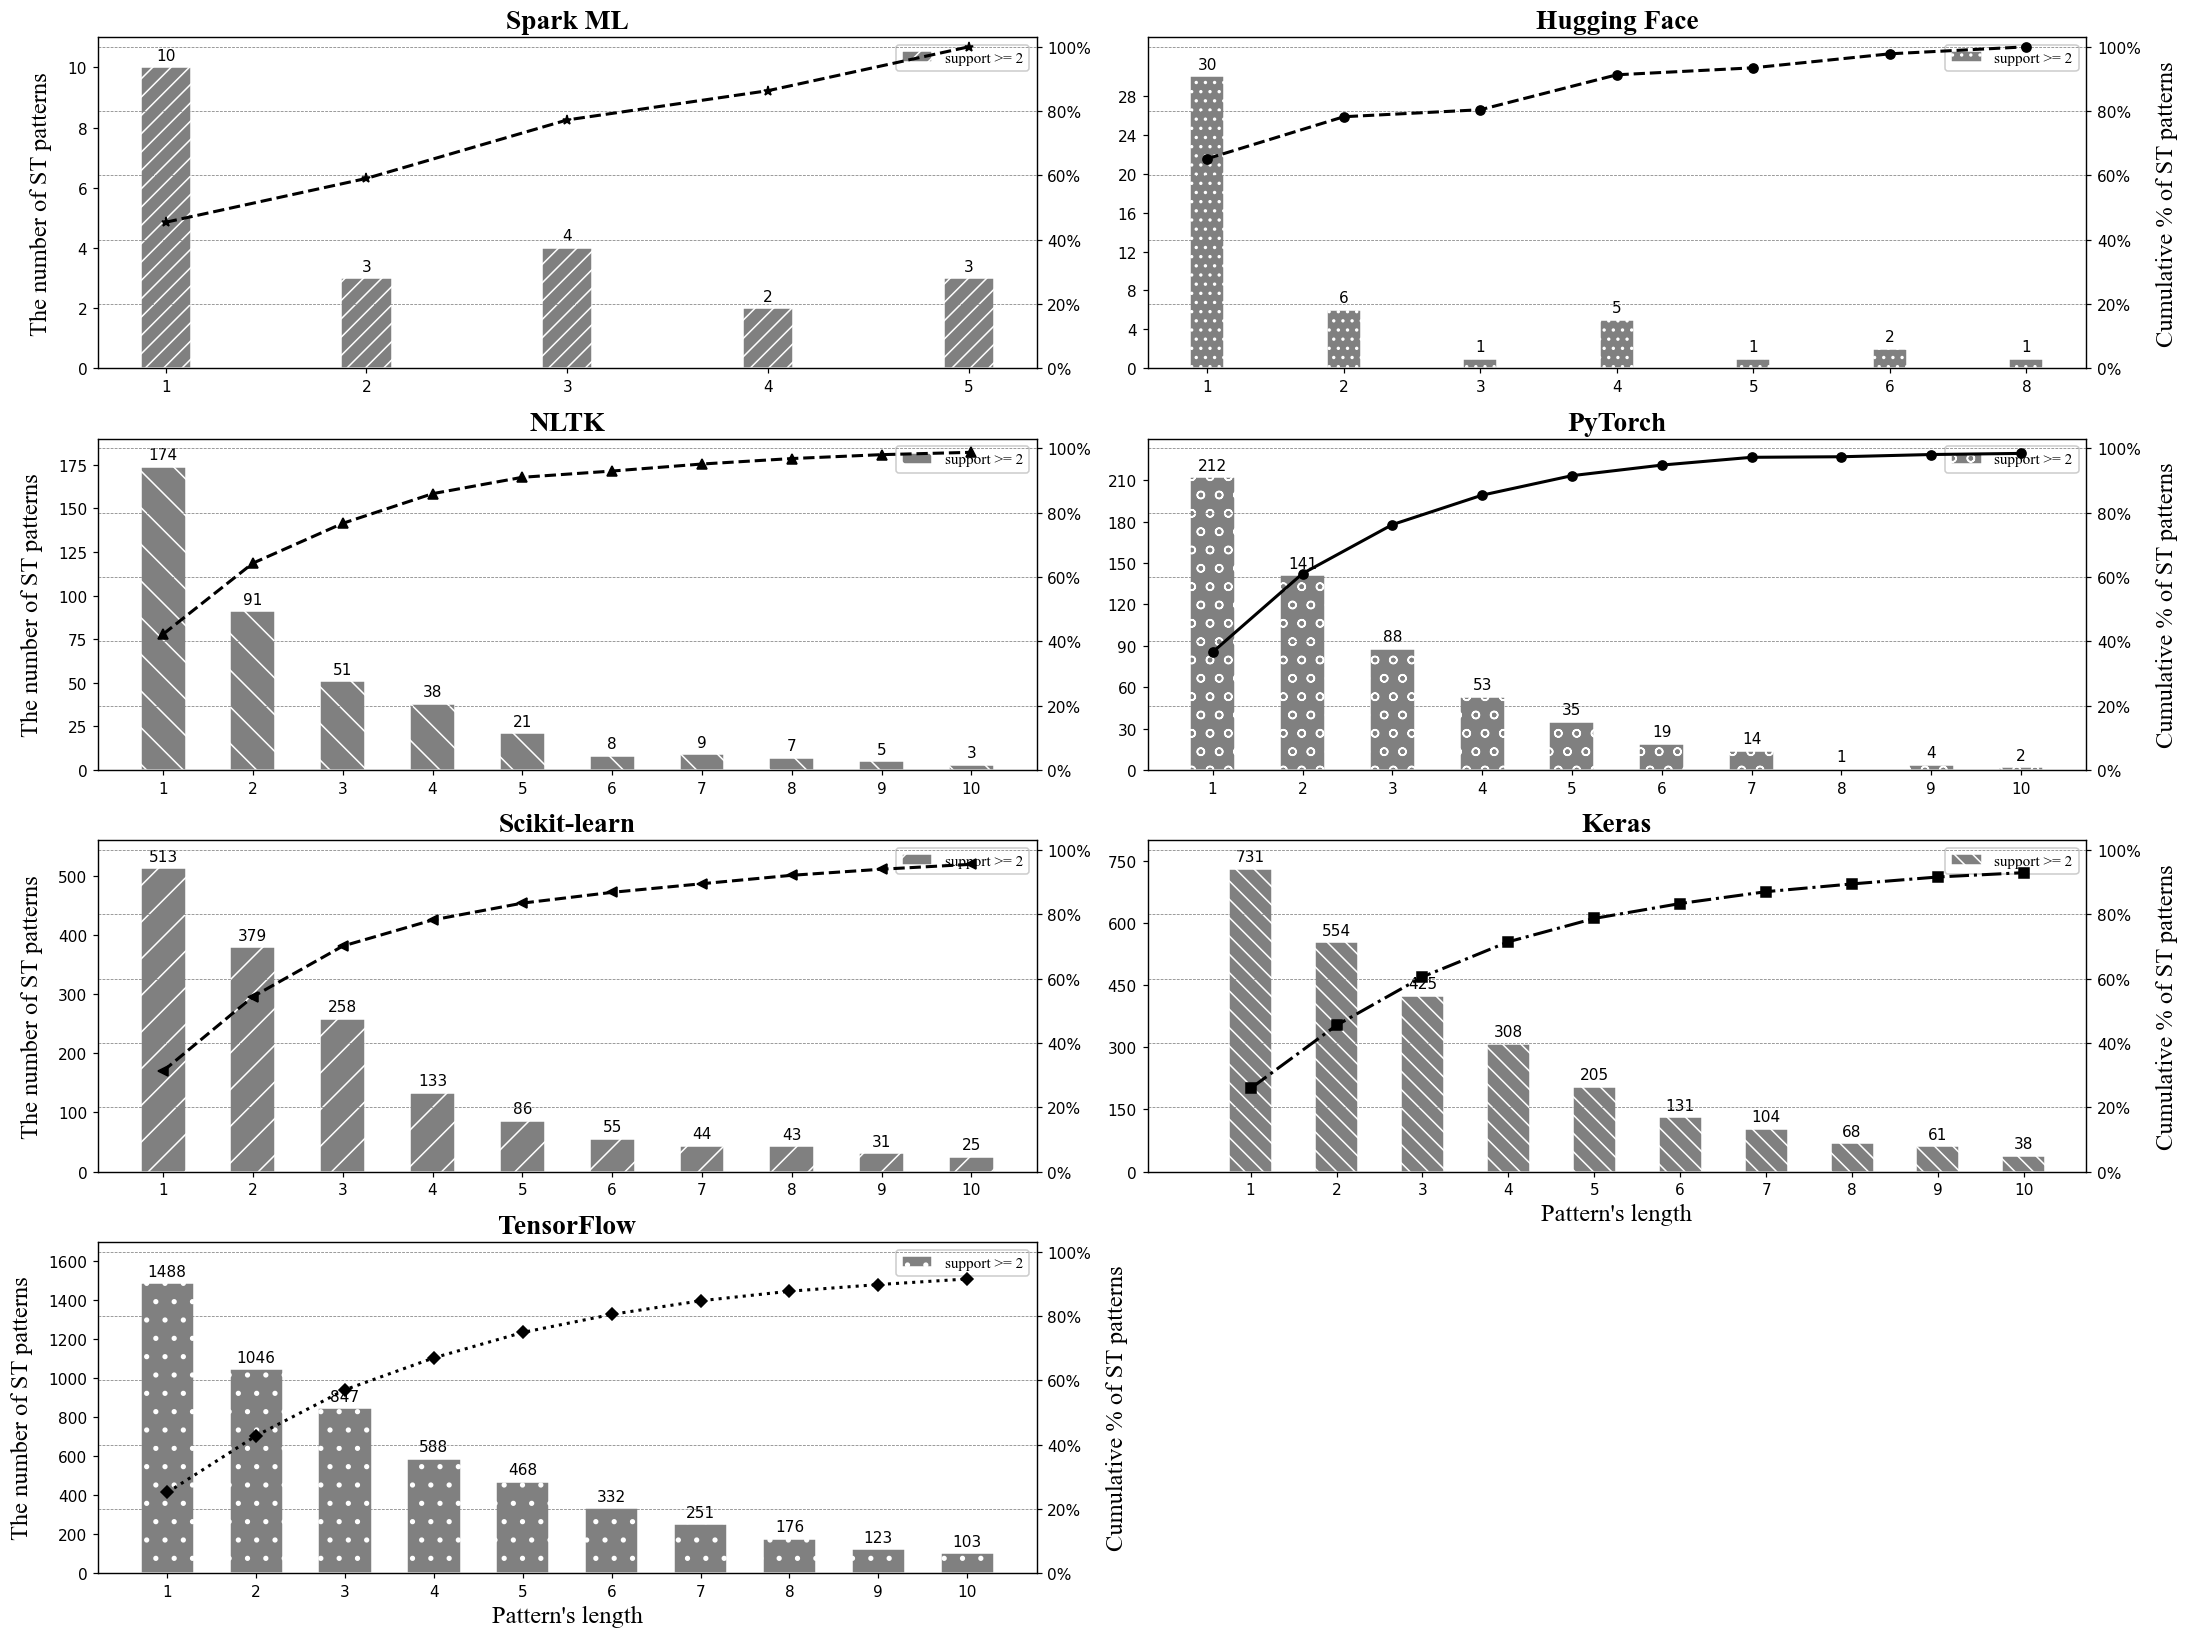

In [233]:
# plt.style.use('classic')
sns.set()
plt.style.use('default')

plt.rcParams["font.family"] = "sans-serif"

# creating grid for subplots
fig = plt.figure(figsize=(20, 15), dpi=110)

ax1 = plt.subplot2grid((4,2), (0, 0))
ax2 = plt.subplot2grid((4,2), (0, 1))
# ax3 = plt.subplot2grid((3,2), (1, 0), colspan=2)
ax3 = plt.subplot2grid((4,2), (1, 0))
ax4 = plt.subplot2grid((4,2), (1, 1))
ax5 = plt.subplot2grid((4,2), (2, 0))
ax6 = plt.subplot2grid((4,2), (2, 1))
ax7 = plt.subplot2grid((4,2), (3, 0))

# #################################### [ Spark ML ] ##############################################################

plength_x = sp_dic_plength["x"]
len_plength_y = sp_dic_plength["y1"]
per_len_plength_y = sp_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax1.bar(plength_x, len_plength_y, width, label='support >= 2', hatch="//", color="gray", edgecolor='w')

ax1.set_title('Spark ML', fontname="Times New Roman", fontsize=18, weight='bold')
ax1.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax1.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax1.set_xticks(plength_x)
# ax1.set_xlim([-1, len(plength_x)])

ax1.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax1.set_yticks(range(0, max(len_plength_y)+1, 2))
ax1.set_ylim(top=11)

ax1.bar_label(rects, padding=3)

axx = ax1.twinx()
plt.plot(plength_x, per_len_plength_y, '--*', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
# axx.set_ylabel('Cumulative % of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax1.grid(False)
ax1.set_facecolor('white')

# #################################### [ Hugging Face ] ###########################################################

plength_x = hf_dic_plength["x"]
len_plength_y = hf_dic_plength["y1"]
per_len_plength_y = hf_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax2.bar(plength_x, len_plength_y, width, label='support >= 2', hatch="..", color="gray", edgecolor='w')

ax2.set_title('Hugging Face', fontname="Times New Roman", fontsize=18, weight='bold')
ax2.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax2.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax2.set_xticks(plength_x)
# ax2.set_xlim([-1, len(plength_x)])

# ax2.set_ylabel('The number of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax2.set_yticks(range(0, max(len_plength_y)+1, 4))
ax2.set_ylim(top=34)

ax2.bar_label(rects, padding=3)

axx = ax2.twinx()
plt.plot(plength_x, per_len_plength_y, '--o', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax2.grid(False)
ax2.set_facecolor('white')

# #################################### [ NLTK ] ##############################################################

plength_x = nltk_dic_plength["x"]
len_plength_y = nltk_dic_plength["y1"]
per_len_plength_y = nltk_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax3.bar(plength_x, len_plength_y, label='support >= 2', width=0.5, hatch="\\", color="gray", edgecolor='w')

ax3.set_title('NLTK', fontname="Times New Roman", fontsize=18, weight='bold')
ax3.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax[2].set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax3.set_xticks(plength_x)
# ax3.set_xlim([-1, len(plength_x)])

ax3.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax3.set_yticks(range(0, max(len_plength_y)+10, 25))
ax3.set_ylim(top=190)

ax3.bar_label(rects, padding=3)

axx = ax3.twinx()
plt.plot(plength_x, per_len_plength_y, '--^', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
# axx.set_ylabel('Cumulative % of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax3.grid(False)
ax3.set_facecolor('white')

# #################################### [ PyTorch ] ##############################################################

plength_x = pt_dic_plength["x"]
len_plength_y = pt_dic_plength["y1"]
per_len_plength_y = pt_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax4.bar(plength_x, len_plength_y, width=0.5, label='support >= 2', hatch="o", color="gray", edgecolor='w')

ax4.set_title('PyTorch', fontname="Times New Roman", fontsize=18, weight='bold')
ax4.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax4.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax4.set_xticks(plength_x)
# ax4.set_xlim([-1, len(plength_x)])

# ax4.set_ylabel('The number of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax4.set_yticks(range(0, max(len_plength_y)+1, 30))
ax4.set_ylim(top=240)

ax4.bar_label(rects, padding=3)

axx = ax4.twinx()
plt.plot(plength_x, per_len_plength_y, '-o', color='black', label='PyTorch', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax4.grid(False)
ax4.set_facecolor('white')

# #################################### [ Sklearn ] ##############################################################

plength_x = sklearn_dic_plength["x"]
len_plength_y = sklearn_dic_plength["y1"]
per_len_plength_y = sklearn_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax5.bar(plength_x, len_plength_y, label='support >= 2', width=0.5, hatch="/", color="gray", edgecolor='w')

ax5.set_title('Scikit-learn', fontname="Times New Roman", fontsize=18, weight='bold')
ax5.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

# ax5.set_xlabel('Support', fontname="Times New Roman", fontsize=16)
ax5.set_xticks(plength_x)
ax5.set_xticklabels(plength_x)
# ax5.set_xlim([-1, len(plength_x)])

ax5.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax5.set_yticks(range(0, max(len_plength_y)+1, 100))
ax5.set_ylim(top=560)

ax5.bar_label(rects, padding=3)

axx = ax5.twinx()
plt.plot(plength_x, per_len_plength_y, '--<', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
# axx.set_ylabel('Cumulative % of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax5.grid(False)
ax5.set_facecolor('white')

# #################################### [ Keras ] ##############################################################

plength_x = keras_dic_plength["x"]
len_plength_y = keras_dic_plength["y1"]
per_len_plength_y = keras_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax6.bar(plength_x, len_plength_y, width=0.5, label='support >= 2', hatch='\\\\', color="gray", edgecolor='w')

ax6.set_title('Keras', fontname="Times New Roman", fontsize=18, weight='bold')
ax6.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

ax6.set_xlabel('Pattern\'s length', fontname="Times New Roman", fontsize=16)
ax6.set_xticks(plength_x)
# ax6.set_xlim([-1, len(plength_x)])

# ax6.set_ylabel('The number of stack trace patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax6.set_yticks(range(0, max(len_plength_y)+100, 150))
ax6.set_ylim(top=800)

ax6.bar_label(rects, padding=3)

axx = ax6.twinx()
plt.plot(plength_x, per_len_plength_y, '-.s', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax6.grid(False)
ax6.set_facecolor('white')
plt.xlim(xmin = -1.2)

# #################################### [ TensorFlow ] ##############################################################

plength_x = tf_dic_plength["x"]
len_plength_y = tf_dic_plength["y1"]
per_len_plength_y = tf_dic_plength["y2"]

# show just 10 elements on x-axis
plength_x = plength_x[:10]
len_plength_y = len_plength_y[:10]
per_len_plength_y = per_len_plength_y[:10]

rects = ax7.bar(plength_x, len_plength_y, width=0.6, label='support >= 2', hatch=".", color="gray", edgecolor='w')

ax7.set_title('TensorFlow', fontname="Times New Roman", fontsize=18, weight='bold')
ax7.legend(prop={'family':'Times New Roman', 'size':10}, facecolor='w', framealpha=1)

ax7.set_xlabel('Pattern\'s length', fontname="Times New Roman", fontsize=16)
ax7.set_xticks(plength_x)
# ax7.set_xlim([-1, len(plength_x)])

ax7.set_ylabel('The number of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax7.set_yticks(range(0, max(len_plength_y)+150, 200))
ax7.set_ylim(top=1700)

ax7.bar_label(rects, padding=3)

axx = ax7.twinx()
plt.plot(plength_x, per_len_plength_y, ':D', color='black', linewidth=2)
axx.yaxis.set_major_formatter(mtick.PercentFormatter())
axx.set_ylabel('Cumulative % of ST patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
axx.set_ylim(0, 103)

axx.grid(axis = 'y', color='gray', linestyle='--', linewidth=0.5)
# ax2.grid(False)
ax7.grid(False)
ax7.set_facecolor('white')
# plt.xlim(xmin=-1.2, xmax=43)

fig.tight_layout()
plt.savefig('./Result/plength_rq2.5.pdf')
plt.show()

In [326]:
sp_dic_cov_ques      = pickle.load(open("./Pickle_data/plt_dic_sp_covered_ques.p", "rb"))
hf_dic_cov_ques      = pickle.load(open("./Pickle_data/plt_dic_hf_covered_ques.p", "rb"))
nltk_dic_cov_ques    = pickle.load(open("./Pickle_data/plt_dic_nltk_covered_ques.p", "rb"))
pt_dic_cov_ques      = pickle.load(open("./Pickle_data/plt_dic_pt_covered_ques.p", "rb"))
tf_dic_cov_ques      = pickle.load(open("./Pickle_data/plt_dic_tf_covered_ques.p", "rb"))
keras_dic_cov_ques   = pickle.load(open("./Pickle_data/plt_dic_keras_covered_ques.p", "rb"))
sklearn_dic_cov_ques = pickle.load(open("./Pickle_data/plt_dic_sklearn_covered_ques.p", "rb"))

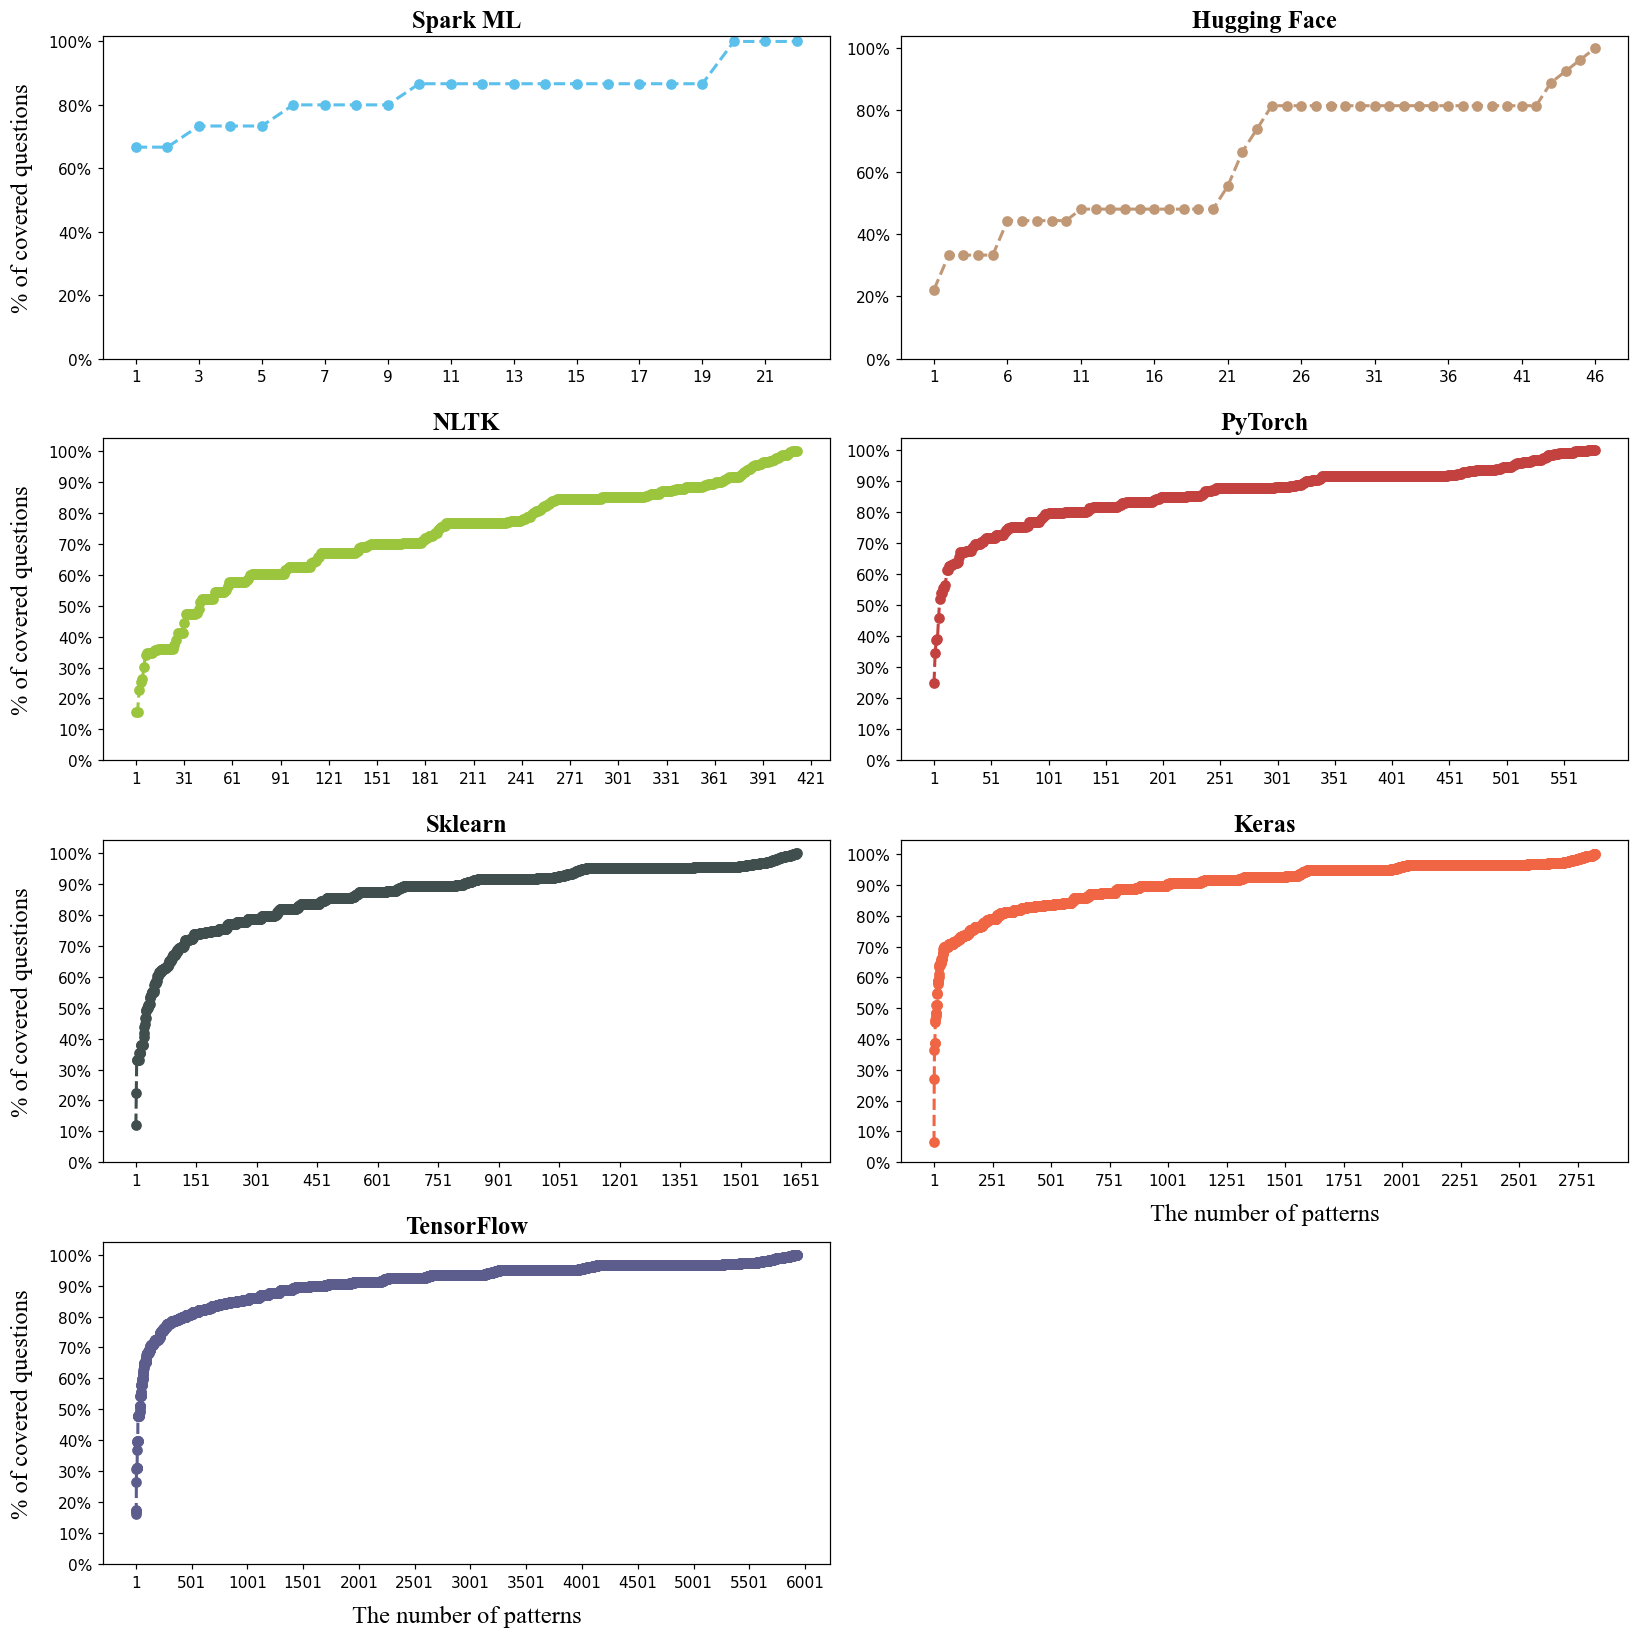

In [327]:
# fig, ax = plt.subplots(4, figsize=(20, 15), dpi=110)

# creating grid for subplots
fig = plt.figure(figsize=(15, 15), dpi=110)
# fig.set_figheight(20)
# fig.set_figwidth(15)

ax1 = plt.subplot2grid((4,2), (0, 0))
ax2 = plt.subplot2grid((4,2), (0, 1))
ax3 = plt.subplot2grid((4,2), (1, 0))
ax4 = plt.subplot2grid((4,2), (1, 1))
ax5 = plt.subplot2grid((4,2), (2, 0))
ax6 = plt.subplot2grid((4,2), (2, 1))
ax7 = plt.subplot2grid((4,2), (3, 0))

# #################################### [ Spark ML ] ##############################################################

x_number_of_patterns = sp_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = sp_dic_cov_ques["y"]

ax1.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#5BC0EB', linewidth=2)

ax1.set_title('Spark ML', fontname="Times New Roman", fontsize=16, weight='bold')

# ax1.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax1.set_xticks(range(1, max(x_number_of_patterns)+1, 2))

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax1.set_yticks(range(0, 101, 20))

# #################################### [ Hugging Face ] ##############################################################

x_number_of_patterns = hf_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = hf_dic_cov_ques["y"]

ax2.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#C19875', linewidth=2)

ax2.set_title('Hugging Face', fontname="Times New Roman", fontsize=16, weight='bold')

# ax2.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax2.set_xticks(range(1, max(x_number_of_patterns)+1, 5))

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax2.set_ylabel('The percentage of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax2.set_yticks(range(0, 101, 20))

# #################################### [ NLTK ] ##############################################################

x_number_of_patterns = nltk_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = nltk_dic_cov_ques["y"]

ax3.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#9BC53D', linewidth=2)

ax3.set_title('NLTK', fontname="Times New Roman", fontsize=16, weight='bold')

# ax3.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax3.set_xticks(range(1, max(x_number_of_patterns)+10, 30))

ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.set_ylabel('% of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax3.set_yticks(range(0, 101, 10))

# #################################### [ PyTorch ] ##############################################################

x_number_of_patterns = pt_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = pt_dic_cov_ques["y"]

ax4.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#C3423F', linewidth=2)

ax4.set_title('PyTorch', fontname="Times New Roman", fontsize=16, weight='bold')

# ax4.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax4.set_xticks(range(1, max(x_number_of_patterns)+10, 50))

ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax4.set_ylabel('The percentage of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax4.set_yticks(range(0, 101, 10))

# #################################### [ Sklearn ] ##############################################################

x_number_of_patterns = sklearn_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = sklearn_dic_cov_ques["y"]

ax5.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#404E4D', linewidth=2)

ax5.set_title('Sklearn', fontname="Times New Roman", fontsize=16, weight='bold')

# ax5.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax5.set_xticks(range(1, max(x_number_of_patterns)+75, 150))

ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.set_ylabel('% of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax5.set_yticks(range(0, 101, 10))

# #################################### [ Keras ] ##############################################################

x_number_of_patterns = keras_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = keras_dic_cov_ques["y"]

ax6.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#F06543', linewidth=2)

ax6.set_title('Keras', fontname="Times New Roman", fontsize=16, weight='bold')

ax6.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax6.set_xticks(range(1, max(x_number_of_patterns)+100, 250))

ax6.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax6.set_ylabel('The percentage of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax6.set_yticks(range(0, 101, 10))

# #################################### [ TensorFlow ] ##############################################################

x_number_of_patterns = tf_dic_cov_ques["x"]
y_axis_peresentage_of_coverage = tf_dic_cov_ques["y"]

ax7.plot(x_number_of_patterns, y_axis_peresentage_of_coverage, '--o', color='#5C5D8D', linewidth=2)

ax7.set_title('TensorFlow', fontname="Times New Roman", fontsize=16, weight='bold')

ax7.set_xlabel('The number of patterns', labelpad=10, fontname="Times New Roman", fontsize=16)
ax7.set_xticks(range(1, max(x_number_of_patterns)+200, 500))

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.set_ylabel('% of covered questions', labelpad=10, fontname="Times New Roman", fontsize=16)
ax7.set_yticks(range(0, 101, 10))

fig.tight_layout()
plt.savefig('./Result/sp_le_rq1.pdf')
plt.show()

In [328]:
total_cov_ques_x = [hf_dic_cov_ques["x"], 
                    keras_dic_cov_ques["x"],
                    nltk_dic_cov_ques["x"], 
                    pt_dic_cov_ques["x"], 
                    sklearn_dic_cov_ques["x"], 
                    sp_dic_cov_ques["x"], 
                    tf_dic_cov_ques["x"]]

total_cov_ques_y = [hf_dic_cov_ques["y"], 
                    keras_dic_cov_ques["y"],
                    nltk_dic_cov_ques["y"], 
                    pt_dic_cov_ques["y"], 
                    sklearn_dic_cov_ques["y"], 
                    sp_dic_cov_ques["y"],
                    tf_dic_cov_ques["y"]]

label = ["HuggingFace", "Keras", "NLTK", "PyTorch", "Scikit-learn", "Spark ML", "TensorFlow"]

# ax.plot(x,x,c='b',marker="^",ls='--',label='GNE',fillstyle='none')

my_style = [('k', "4", '--'), ('#1bd164', "", 'dashed'), ('orange', "", 'dashdot'), ('purple', "v", 'dotted'), ('#1D05F5', "^", ':'), ('#AD521D', "*", '--'), ('#FA496A', 's', 'solid')]
# my_style = [('k', "^", '--'), ('#1bd164', "+", '--'), ('#1D05F5', "*", '-'), ('r', "v", '-'), ('#A79FED', (8,2,0), '--'), ('#AD521D', "s", ':'), ('#FA496A', "d", 'dotted')]
# ValueError: ',' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

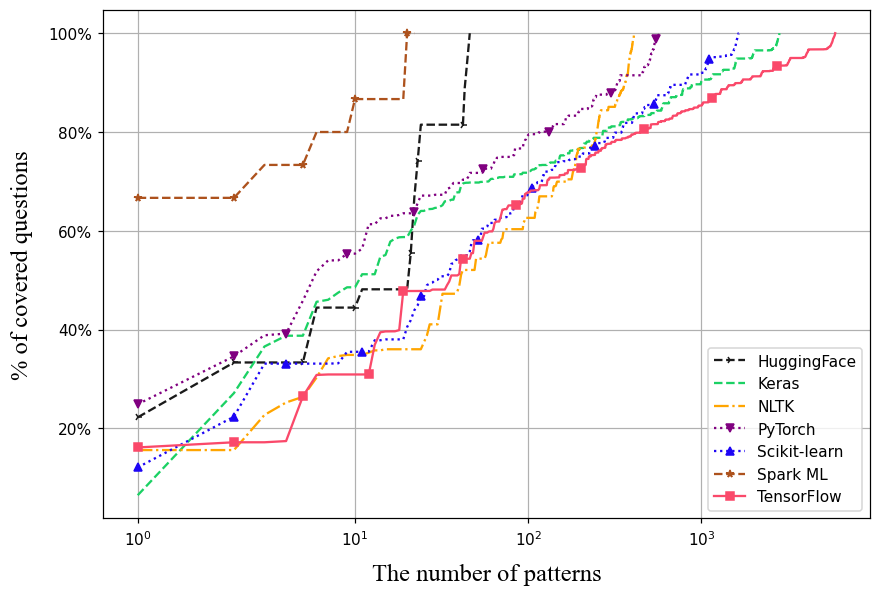

In [329]:
fig = plt.figure(figsize=(9, 6), dpi=110)
ax1 = fig.add_subplot(111)

plt_lst = []
for x, y, l, s in zip(total_cov_ques_x, total_cov_ques_y, label, my_style):
    plt_lst.append(ax1.plot(x, y, label=l, c=s[0], marker=s[1], ls=s[2], markersize=5, markevery=0.1))
    
ax1.legend(loc='lower right')
# ax1.set_xlabel('Pattern\'s length', fontproperties=font)
ax1.set_xlabel('The number of patterns', labelpad=10, fontproperties=font)
# ax1.set_ylabel('Cumulative % of stack trace patterns', labelpad=0, fontproperties=font)
ax1.set_ylabel('% of covered questions', labelpad=10, fontproperties=font)
# ax1.set_title('RQ2')

# ax1.axis(ymin=0, ymax=102)
# ax1.axis(xmin=0, xmax=6000)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

ax1.set_xscale('symlog')

plt.grid(True)
plt.savefig('./Result/sp_le_rq1_v2.pdf')
plt.show()

In [330]:
hf_dic_cov_ques["x"] = [x*100/len(hf_dic_cov_ques["x"]) for x in hf_dic_cov_ques["x"]]
keras_dic_cov_ques["x"] = [x*100/len(keras_dic_cov_ques["x"]) for x in keras_dic_cov_ques["x"]]
nltk_dic_cov_ques["x"] = [x*100/len(nltk_dic_cov_ques["x"]) for x in nltk_dic_cov_ques["x"]]
pt_dic_cov_ques["x"] = [x*100/len(pt_dic_cov_ques["x"]) for x in pt_dic_cov_ques["x"]]
sklearn_dic_cov_ques["x"] = [x*100/len(sklearn_dic_cov_ques["x"]) for x in sklearn_dic_cov_ques["x"]]
sp_dic_cov_ques["x"] = [x*100/len(sp_dic_cov_ques["x"]) for x in sp_dic_cov_ques["x"]]
tf_dic_cov_ques["x"] = [x*100/len(tf_dic_cov_ques["x"]) for x in tf_dic_cov_ques["x"]]

total_cov_ques_x = [hf_dic_cov_ques["x"], 
                    keras_dic_cov_ques["x"],
                    nltk_dic_cov_ques["x"], 
                    pt_dic_cov_ques["x"], 
                    sklearn_dic_cov_ques["x"], 
                    sp_dic_cov_ques["x"], 
                    tf_dic_cov_ques["x"]]

total_cov_ques_y = [hf_dic_cov_ques["y"], 
                    keras_dic_cov_ques["y"],
                    nltk_dic_cov_ques["y"], 
                    pt_dic_cov_ques["y"], 
                    sklearn_dic_cov_ques["y"], 
                    sp_dic_cov_ques["y"],
                    tf_dic_cov_ques["y"]]

In [331]:
label = ["HuggingFace", "Keras", "NLTK", "PyTorch", "Scikit-learn", "Spark ML", "TensorFlow"]

# ax.plot(x,x,c='b',marker="^",ls='--',label='GNE',fillstyle='none')

my_style = [('k', "4", '--'), ('#1bd164', "", 'dashed'), ('orange', "", 'dashdot'), ('purple', "v", 'dotted'), ('#1D05F5', "^", ':'), ('#AD521D', "*", '--'), ('#FA496A', 's', 'solid')]
# my_style = [('k', "^", '--'), ('#1bd164', "+", '--'), ('#1D05F5', "*", '-'), ('r', "v", '-'), ('#A79FED', (8,2,0), '--'), ('#AD521D', "s", ':'), ('#FA496A', "d", 'dotted')]
# ValueError: ',' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

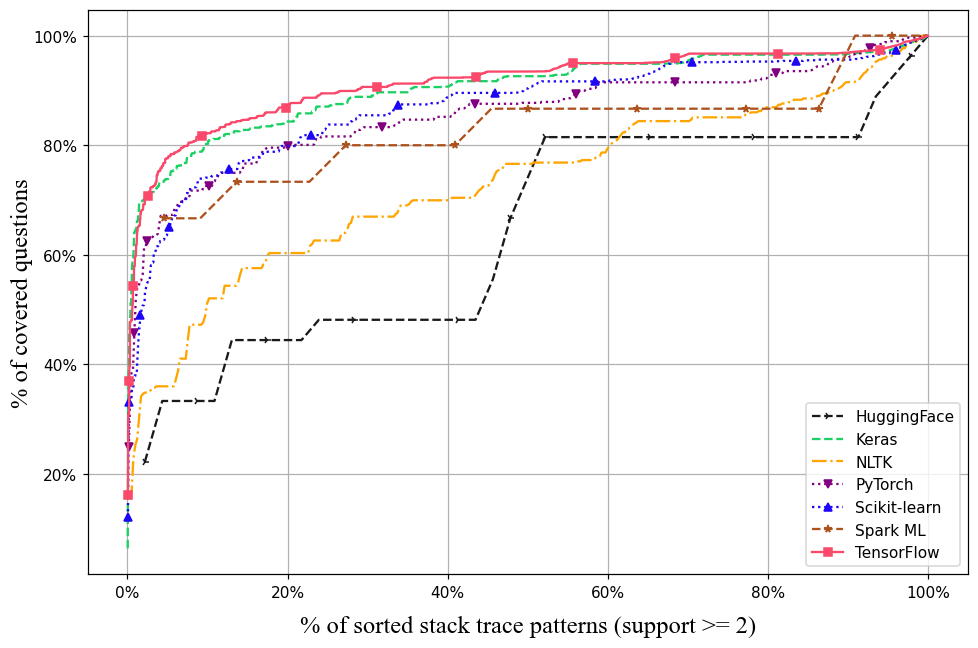

In [334]:
fig = plt.figure(figsize=(9, 6), dpi=110)
ax1 = fig.add_subplot(111)

plt_lst = []
for x, y, l, s in zip(total_cov_ques_x, total_cov_ques_y, label, my_style):
    plt_lst.append(ax1.plot(x, y, label=l, c=s[0], marker=s[1], ls=s[2], markersize=5, markevery=0.1))
    
ax1.legend(loc='lower right')
ax1.set_xlabel('% of sorted stack trace patterns (support >= 2)', labelpad=10, fontproperties=font)
ax1.set_ylabel('% of covered questions', labelpad=0, fontproperties=font)
# ax1.set_title('RQ2')

# ax1.axis(ymin=0, ymax=102)
# ax1.axis(xmin=0, xmax=6000)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

# ax1.set_yticks(range(0, 101, 5))

plt.grid(True)
plt.tight_layout()
plt.savefig('./Result/sp_le_rq1_v3.pdf')
plt.show()

# RQ2.5: Round 2

Prepared Data for second quantitaive study

In [241]:
lst_sp_pattern_w_sup      = pickle.load(open("./Pickle_data/sp_ccspan_2_result_pure.p", "rb"))
lst_hug_pattern_w_sup     = pickle.load(open("./Pickle_data/hug_ccspan_2_result_pure.p", "rb"))
lst_nltk_pattern_w_sup    = pickle.load(open("./Pickle_data/nltk_ccspan_2_result_pure.p", "rb"))
lst_pt_pattern_w_sup      = pickle.load(open("./Pickle_data/pt_ccspan_2_result_pure.p", "rb"))
lst_tf_pattern_w_sup      = pickle.load(open("./Pickle_data/tf_ccspan_2_result_pure.p", "rb"))
lst_keras_pattern_w_sup   = pickle.load(open("./Pickle_data/keras_ccspan_2_result_pure.p", "rb"))
lst_sklearn_pattern_w_sup = pickle.load(open("./Pickle_data/sklearn_ccspan_2_result_pure.p", "rb"))

In [242]:
len(lst_sp_pattern_w_sup), len(lst_hug_pattern_w_sup), len(lst_nltk_pattern_w_sup), len(lst_pt_pattern_w_sup), len(lst_tf_pattern_w_sup), len(lst_keras_pattern_w_sup), len(lst_sklearn_pattern_w_sup)

(22, 46, 412, 578, 5927, 2824, 1640)

In [243]:
def extend_list_based_on_supp(lst: list) -> list:
    extend_lst = []
    for tup in lst:
        for _ in range(0, tup[1]):
            extend_lst.append(tup)
    shuffle(extend_lst)
    return extend_lst

In [244]:
ex_sp_pattern      = extend_list_based_on_supp(lst_sp_pattern_w_sup)
ex_hug_pattern     = extend_list_based_on_supp(lst_hug_pattern_w_sup)
ex_nltk_pattern    = extend_list_based_on_supp(lst_nltk_pattern_w_sup)
ex_pt_pattern      = extend_list_based_on_supp(lst_pt_pattern_w_sup)
ex_tf_pattern      = extend_list_based_on_supp(lst_tf_pattern_w_sup)
ex_keras_pattern   = extend_list_based_on_supp(lst_keras_pattern_w_sup)
ex_sklearn_pattern = extend_list_based_on_supp(lst_sklearn_pattern_w_sup)

In [245]:
total_ST = len(ex_sp_pattern) + len(ex_hug_pattern) + len(ex_nltk_pattern) + len(ex_pt_pattern) + len(ex_tf_pattern) + len(ex_keras_pattern) + len(ex_sklearn_pattern)

In [246]:
total_ST

134193

In [247]:
len(ex_sp_pattern)
round(len(ex_sp_pattern) * 780 / total_ST)

1

In [248]:
round(len(ex_sklearn_pattern) * 780 / total_ST)

80

sp = 1, hugh=1, nltk=14, pt=21, tf=491, keras=174, sklearn=80 ==== total = 780

random.sample(seq, n)	Generate n unique samples (multiple items) from a sequence without repetition. Here, A seq can be a list, set, string, tuple. Sample without replacement.

In [249]:
def unique_random(pat_lst: list, num_sample: int)-> list:
    random.seed(780) # <--- it's a flag!
    sample_list = []
    for _ in range(0, num_sample):
        sample_ins = random.sample(pat_lst, 1)
        sample_list.append(sample_ins[0])
        # pat_lst = list(filter((sample_ins).__ne__, pat_lst))
        pat_lst = list(filter(lambda _tmp: _tmp != sample_ins[0], pat_lst))
    return sample_list

In [250]:
selected_sp_pattern      = unique_random(ex_sp_pattern, 1)
selected_hug_pattern     = unique_random(ex_hug_pattern, 1)
selected_nltk_pattern    = unique_random(ex_nltk_pattern, 14)
selected_pt_pattern      = unique_random(ex_pt_pattern, 21)
selected_tf_pattern      = unique_random(ex_tf_pattern, 491)
selected_keras_pattern   = unique_random(ex_keras_pattern, 174)
selected_sklearn_pattern = unique_random(ex_sklearn_pattern, 80)

In [251]:
sp_pattern_df = pd.DataFrame(selected_sp_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
sp_pattern_df["Library"] = "Spark ML"

tf_pattern_df = pd.DataFrame(selected_tf_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
tf_pattern_df["Library"] = "Tensorflow"

nltk_pattern_df = pd.DataFrame(selected_nltk_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
nltk_pattern_df["Library"] = "NLTK"

keras_pattern_df = pd.DataFrame(selected_keras_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
keras_pattern_df["Library"] = "Keras"

pt_pattern_df = pd.DataFrame(selected_pt_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
pt_pattern_df["Library"] = "PyTorch"

sklearn_pattern_df = pd.DataFrame(selected_sklearn_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
sklearn_pattern_df["Library"] = "Sklearn"

hug_pattern_df = pd.DataFrame(selected_hug_pattern, columns = ['Q_id_lst', 'Support', 'Pattern_esp'])
hug_pattern_df["Library"] = "Hugging Face"

selected_pattern_df = pd.concat([sp_pattern_df, tf_pattern_df, nltk_pattern_df, keras_pattern_df, pt_pattern_df, sklearn_pattern_df, hug_pattern_df], ignore_index=True)

In [252]:
selected_pattern_df.shape

(782, 4)

In [253]:
selected_pattern_df["Q_id_set"] = selected_pattern_df.Q_id_lst.apply(lambda q_list: set(q_list))

In [254]:
selected_pattern_df.drop("Q_id_lst", axis=1, inplace=True)

In [255]:
selected_pattern_df["Rand_5_urls"] = selected_pattern_df.apply(lambda row: get_q_id_url(row.Q_id_set), axis=1)

In [256]:
# Generate URLs columns
for index in range(1, 6):
    col_string = "URL_" + str(index)
    selected_pattern_df[col_string] = np.nan
for index in selected_pattern_df.index:
    _c = 1
    for item in selected_pattern_df.loc[index, "Rand_5_urls"]:
        col_string = "URL_" + str(_c)
        selected_pattern_df.loc[index, col_string] = item
        _c += 1

In [257]:
selected_pattern_df.head(1)

,Support,Pattern_esp,Library,Q_id_set,Rand_5_urls,URL_1,URL_2,URL_3,URL_4,URL_5
0,10,"((protocol, get_return_value),)",Spark ML,"{37260902, 49729510, 54776007, 32714825, 53632689, 54219826, 33574807, 46257819, 40366588}","[https://stackoverflow.com/questions/54776007, https://stackoverflow.com/questions/46257819, https://stackoverflow.com/questions/32714825, https://stackoverflow.com/questions/49729510, https://stackoverflow.com/questions/33574807]",https://stackoverflow.com/questions/54776007,https://stackoverflow.com/questions/46257819,https://stackoverflow.com/questions/32714825,https://stackoverflow.com/questions/49729510,https://stackoverflow.com/questions/33574807


In [258]:
selected_pattern_df.drop("Rand_5_urls", axis=1, inplace=True)

In [259]:
# Change the order od columns
column_names = ["Library", "Q_id_set", "Support", "Pattern_esp", "URL_1", "URL_2", "URL_3", "URL_4", "URL_5"]

selected_pattern_df = selected_pattern_df.reindex(columns=column_names)

In [260]:
selected_pattern_df.to_excel("./Excel_data/RQ3_selected_patterns.xlsx")

In [261]:
def checker_patterns_are_unique(patt_lst: list) -> bool:
    higher_one = True
    pat_c_dic = Counter(patt_lst)
    for _, freq in pat_c_dic.items():
        if freq > 1: 
            higher_one = False
            break
    return higher_one

In [262]:
print(checker_patterns_are_unique(get_pattern_tup(lst_tf_pattern_w_sup)))
print(checker_patterns_are_unique(get_pattern_tup(selected_tf_pattern)))

True
True


In [263]:
print("Number of patterns:", len(lst_sp_pattern_w_sup)+ len(lst_hug_pattern_w_sup)+ len(lst_nltk_pattern_w_sup)+ len(lst_pt_pattern_w_sup)+ len(lst_tf_pattern_w_sup)+ len(lst_keras_pattern_w_sup)+ len(lst_sklearn_pattern_w_sup))

Number of patterns: 11449


In [264]:
1/(len(lst_sp_pattern_w_sup)/11449)

520.4090909090909

# RQ3: Challenging 

## Prepare labels file

Read emperical study file - round 2(.csv)

In [265]:
data_file = working_directory_path + "./CSV_data/emperical_study_round2.csv"
path = Path(data_file)

if path.suffix == ".csv":
    r2_labling_pure = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

In [266]:
r2_labling_pure.columns

Index(['Library', 'Q_id_set', 'Support', 'Pattern_esp', 'URL_1', 'URL_2', 'URL_3', 'URL_4', 'URL_5', 'Final_label', 'index', 'Label', 'Freq.', 'Percentage', 'Percentage.1'], dtype='object')

Make clean the labling dataframe.

In [267]:
r2_labling = r2_labling_pure.drop(['URL_1', 'URL_2', 'URL_3', 'URL_4', 'URL_5', 'index', 'Label', 'Freq.', 'Percentage', 'Percentage.1', 'Support'], axis=1)

In [268]:
r2_labling.head(1)

,Library,Q_id_set,Pattern_esp,Final_label
0,Spark ML,"{37260902, 49729510, 54776007, 53632689, 46257819, 40366588}","(('java_gateway', '__call__'), ('utils', 'deco'))",method wrapper


## Prepare statstics information - Questions with ST

### Questions with answer that come from answer parts 

In [269]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_sklearn_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_sklearn_w_stack['Library'] = "sklearn"

In [270]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_nltk_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_nltk_w_stack['Library'] = "nltk"

In [271]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_pt_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_pt_w_stack['Library'] = "pt"

In [272]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_keras_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_keras_w_stack['Library'] = "keras"

In [273]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_hf_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_hug_w_stack['Library'] = "hugging face"

In [274]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_sp_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_sp_w_stack['Library'] = "sp"

In [275]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_tf_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_tf_w_stack['Library'] = "tf"

In [276]:
stat_info_w_ans = pd.concat([df_tf_w_stack, df_sp_w_stack, df_hug_w_stack, df_keras_w_stack, df_pt_w_stack, df_nltk_w_stack, df_sklearn_w_stack], ignore_index=True)

In [277]:
stat_info_w_ans.tail()

,Q_id_x,Q_create_time,View_count,Comment_count,Score,Answer_count,Accepted_Answer_id,Answer_tup,First_ans_time,First_acc_ans_time,Duration_ans,Duration_acc_ans
54753,65153240,2020-12-05 02:38:35,20,0,0,1,NaN,"[(65153309.0, '2020-12-05 02:52:11')]",2020-12-05 02:52:11,NaN,0.226667,NaN
54754,65155034,2020-12-05 08:15:41,38,2,0,1,65155544.0,"[(65155544.0, '2020-12-05 09:33:12')]",2020-12-05 09:33:12,2020-12-05 09:33:12,1.291944,1.291944
54755,65159627,2020-12-05 17:01:43,28,4,1,1,NaN,"[(65162851.0, '2020-12-05 22:58:59')]",2020-12-05 22:58:59,NaN,5.954444,NaN
54756,65159648,2020-12-05 17:04:15,12,0,1,1,NaN,"[(65163086.0, '2020-12-05 23:30:14')]",2020-12-05 23:30:14,NaN,6.433056,NaN
54757,65160040,2020-12-05 17:45:28,12,0,0,1,65160411.0,"[(65160411.0, '2020-12-05 18:17:07')]",2020-12-05 18:17:07,2020-12-05 18:17:07,0.527500,0.527500


We find out q_id is not unique in our dataframe becasue each q_id could have multiple tags (belongs to multiple libraries) so we delete those

In [278]:
stat_info_w_ans_wo_dup = stat_info_w_ans.drop_duplicates(subset=['Q_id_x', 'Q_create_time', 'View_count'], keep='first')

### Questions w/o answer that come from table 3

In [279]:
# sklearn
pure_data = working_directory_path + "./CSV_data/plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_sklearn_w_stack['Library'] = "sklearn"

In [280]:
# nltk
pure_data = working_directory_path + "./CSV_data/plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_nltk_w_stack['Library'] = "nltk"

In [281]:
# PT
pure_data = working_directory_path + "./CSV_data/plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_pt_w_stack['Library'] = "pt"

In [282]:
# keras
pure_data = working_directory_path + "./CSV_data/plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_keras_w_stack['Library'] = "keras"

In [283]:
# hugh
pure_data = working_directory_path + "./CSV_data/plt_df_hf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_hug_w_stack['Library'] = "hugh"

In [284]:
# spark
pure_data = working_directory_path + "./CSV_data/plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_sp_w_stack['Library'] = "sp"

In [285]:
# tf
pure_data = working_directory_path + "./CSV_data/plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding, index_col=0)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# df_tf_w_stack['Library'] = "tf"

In [286]:
stat_info_wo_answer = pd.concat([df_tf_w_stack, df_sp_w_stack, df_hug_w_stack, df_keras_w_stack, df_pt_w_stack, df_nltk_w_stack, df_sklearn_w_stack], ignore_index=True)

In [287]:
stat_info_wo_answer.head(2)

,First_ans_time,First_acc_ans_time,Answers,Q_id,Q_create_time,View_count,Answer_count,Comment_count,Score,Accepted_Answer_id
0,NaN,NaN,NaN,51839415,2018-08-14 10:35:10,383,1,5,0,NaN
1,NaN,NaN,NaN,59632120,2020-01-07 16:13:19,654,1,0,1,NaN


In [288]:
stat_info_wo_ans_wo_dup = stat_info_wo_answer.drop_duplicates(subset=['Q_id', 'Q_create_time', 'Answer_count'], keep='first')

## Connect statistics information with label dataframe

In [289]:
stat_info_w_ans_wo_dup["label"] = np.nan

/tmp/ipykernel_29597/2740284476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_info_w_ans_wo_dup["label"] = np.nan


In [290]:
# df_q_stat_w_label = df_q_stat_w_label.head(4)
# df_q_stat_w_label

In [291]:
# _tmp_dict_22 = {0: {'Q_id_x': 133, 'Q_create_time': 1, 'View_count': 1, 'Comment_count': 155, 'Score': 1, 'Answer_count': 1, 'Accepted_Answer_id': 1, 'Answer_tup': np.nan, 'First_acc_ans_time': np.nan, 'First_ans_time': np.nan,'Duration_ans': np.nan, 'Duration_acc_ans': np.nan, 'label': np.nan}}
# print(_tmp_dict_22)
# # _tmp2_dict = pd.DataFrame(_tmp_dict, columns=['Q_id_x', 'Q_create_time', 'View_count', 'Comment_count', 'Score', 'Answer_count', 'Accepted_Answer_id', 'Answer_tup', 'First_acc_ans_time', 'First_ans_time' ,'Duration_ans', 'Duration_acc_ans', 'label'])

# _tmp2_dict = pd.DataFrame(_tmp_dict_22)
# _tmp2_dict = _tmp2_dict.transpose()
# _tmp2_dict.at[0, "label"] = ["d"]


# # _tmp2_dict.label = list([1, 2])
# df_q_stat_w_label = pd.concat([df_q_stat_w_label, _tmp2_dict], ignore_index=True)

In [292]:
# _tmp_dict.values()

In [293]:
list_q_not_exist = []
list_q_w_dup_labels = []

df_q_stat_w_label = pd.DataFrame(columns=['Q_id_x', 'Q_create_time', 'View_count', 'Comment_count', 'Score', 'Answer_count', 'Accepted_Answer_id', 'Answer_tup', 'First_ans_time', 'First_acc_ans_time', 'Duration_ans', 'Duration_acc_ans', 'label'])

def assign_label_to_list(q_id_set:set, label:str) -> None:
    global df_q_stat_w_label
    
    def mySetConv(txt: str) -> set:
        return set() if txt == 'set()' else ast.literal_eval(txt)

    q_id_set = mySetConv(q_id_set)
    
    for q_id in q_id_set:
        
        # Check the existance of the q_id in the answer question df (stat_info_w_ans_wo_dup)
        if not stat_info_w_ans_wo_dup[stat_info_w_ans_wo_dup["Q_id_x"] == q_id].empty:
            
            # Check just one observation
            if len(stat_info_w_ans_wo_dup.loc[stat_info_w_ans_wo_dup["Q_id_x"] == q_id].index.to_list()) > 1:
                print("[Q-w-ans] It's not possiable! We should have just one observation for each question id.", q_id)
                
            # If the row is new
            if df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id].empty:

                # df_q_stat_w_label = pd.concat([df_q_stat_w_label, stat_info_w_ans_wo_dup[stat_info_w_ans_wo_dup["Q_id_x"] == q_id]])
                # df_q_stat_w_label.at[df_q_stat_w_label[df_q_stat_w_label["Q_id_x"] == q_id].index.tolist()[0], "label"] = [label]
                
                _tmp3_df = stat_info_w_ans_wo_dup[stat_info_w_ans_wo_dup["Q_id_x"] == q_id].copy()
                _tmp3_df.at[_tmp3_df[_tmp3_df["Q_id_x"] == q_id].index.tolist()[0], "label"] = [label]
                # print(_tmp3_df)

                df_q_stat_w_label = df_q_stat_w_label.append(_tmp3_df, ignore_index=True)   
                
                # df_q_stat_w_label.at[df_q_stat_w_label[df_q_stat_w_label["Q_id_x"] == q_id].index.tolist()[0], "label"] = [label]
                
            # If the row is exist, check we saw the label in the past or not
            elif label in df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id, "label"].item():
                ## We find out the label is exist in label list
                continue                        

            ## So it's new and we have to add it
            else:
                global list_q_w_dup_labels
                list_q_w_dup_labels.append(q_id)
                df_q_stat_w_label.at[df_q_stat_w_label[df_q_stat_w_label["Q_id_x"] == q_id].index.tolist()[0], "label"] = np.append(df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id, "label"].item(), label)
                # print("This question id had label in advance!")                
        
        # Check the existance of the q_id in the w/o answer questions df (stat_info_wo_ans_wo_dup)
        elif not stat_info_wo_ans_wo_dup[stat_info_wo_ans_wo_dup["Q_id"] == q_id].empty:
                
            # Check just one observation
            if len(stat_info_wo_ans_wo_dup.loc[stat_info_wo_ans_wo_dup["Q_id"] == q_id].index.to_list()) > 1:
                print("[Q-wo-ans] It's not possiable! We should have just one observation for each question id.", q_id)           
        
            # If the row is new
            if df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id].empty:

                _tmp_df = stat_info_wo_ans_wo_dup[stat_info_wo_ans_wo_dup["Q_id"] == q_id]
                                                  
                _tmp_dict = {0: {'Q_id_x': _tmp_df.Q_id.item(), 'Q_create_time': _tmp_df.Q_create_time.item(), 'View_count': _tmp_df.View_count.item(), 'Comment_count': _tmp_df.Comment_count.item(), 'Score': _tmp_df.Score.item(), 'Answer_count': _tmp_df.Answer_count.item(), 'Accepted_Answer_id': _tmp_df.Accepted_Answer_id.item(), 'Answer_tup': np.nan, 'First_acc_ans_time': np.nan, 'First_ans_time': np.nan,'Duration_ans': np.nan, 'Duration_acc_ans': np.nan, 'label': np.nan}}
                _tmp2_dict = pd.DataFrame(_tmp_dict)
                _tmp2_dict = _tmp2_dict.transpose()
                _tmp2_dict.at[0, "label"] = [label]
                
                # df_q_stat_w_label = pd.concat([df_q_stat_w_label, _tmp2_dict], ignore_index=True)
                # df_q_stat_w_label = pd.concat([df_q_stat_w_label, pd.DataFrame.from_records(_tmp2_dict)], ignore_index=True)
                df_q_stat_w_label = df_q_stat_w_label.append(_tmp2_dict, ignore_index=True)
                # df_q_stat_w_label = df_q_stat_w_label.append(_tmp2_dict, ignore_index=True)
                
                # print(df_q_stat_w_label)
                
            # If the row is exist, check we saw the label in the past or not
            elif label in df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id, "label"].item():
                ## We find out the label is exist in label list
                # print(label, df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id, "label"].item())
                continue                        

            ## So label is new and we have to add it to the past row
            else:
                list_q_w_dup_labels.append(q_id)
                df_q_stat_w_label.at[df_q_stat_w_label[df_q_stat_w_label["Q_id_x"] == q_id].index.tolist()[0], "label"] = np.append(df_q_stat_w_label.loc[df_q_stat_w_label["Q_id_x"] == q_id, "label"].item(), label)
                # print("This question id had label in advance!") 
        else:
            global list_q_not_exist
            list_q_not_exist.append(q_id)
            # print("It's not possiable! The question id is not exist in the dataframe.", q_id)
            continue

In [294]:
_ = r2_labling.apply(lambda row: assign_label_to_list(row.Q_id_set, row.Final_label), axis=1)
print("The number of q_id that is not exist: ", len(list_q_not_exist))
print("The number of q_id has multiple label: ", len(set(list_q_w_dup_labels)))

The number of q_id that is not exist:  0
The number of q_id has multiple label:  2763


In [295]:
df_q_stat_w_label.head(5)

,Q_id_x,Q_create_time,View_count,Comment_count,Score,Answer_count,Accepted_Answer_id,Answer_tup,First_ans_time,First_acc_ans_time,Duration_ans,Duration_acc_ans,label
0,49729510,2018-04-09 09:19:08,492,0,2,1,49729605.0,"[(49729605.0, '2018-04-09 09:24:31')]",2018-04-09 09:24:31,2018-04-09 09:24:31,0.089722,0.089722,[method wrapper]
1,37260902,2016-05-16 18:36:08,7846,2,14,3,NaN,"[(37262463.0, '2016-05-16 20:11:25'), (41162688.0, '2016-12-15 11:09:10'), (63181936.0, '2020-07-30 21:56:10')]",2016-05-16 20:11:25,NaN,1.588056,NaN,[method wrapper]
2,54776007,2019-02-19 22:36:58,384,2,1,1,54776264.0,"[(54776264.0, '2019-02-19 23:05:12')]",2019-02-19 23:05:12,2019-02-19 23:05:12,0.470556,0.470556,[method wrapper]
3,53632689,2018-12-05 12:46:41,461,0,0,1,53636176.0,"[(53636176.0, '2018-12-05 15:59:24')]",2018-12-05 15:59:24,2018-12-05 15:59:24,3.211944,3.211944,[method wrapper]
4,46257819,2017-09-16 19:42:56,1592,0,2,1,46257990.0,"[(46257990.0, '2017-09-16 20:03:55')]",2017-09-16 20:03:55,2017-09-16 20:03:55,0.349722,0.349722,[method wrapper]


In [296]:
df_q_stat_w_label_ex = pd.DataFrame(columns=['Q_id_x', 'Q_create_time', 'View_count', 'Comment_count', 'Score', 'Answer_count', 'Accepted_Answer_id', 'Answer_tup', 'First_ans_time', 'First_acc_ans_time', 'Duration_ans', 'Duration_acc_ans', 'label'])

def extend_df_based_on_labels(row: pd.DataFrame) -> None:
    global df_q_stat_w_label_ex
    for label in row.label:
        _tmp_df = row.copy()
        _tmp_df.label = label
        df_q_stat_w_label_ex = df_q_stat_w_label_ex.append(_tmp_df, ignore_index=True)


In [297]:
_ = df_q_stat_w_label.apply(lambda row: extend_df_based_on_labels(row), axis=1)

In [298]:
df_q_stat_w_label_ex["Q_id_x"] = pd.to_numeric(df_q_stat_w_label_ex["Q_id_x"])
df_q_stat_w_label_ex["View_count"] = pd.to_numeric(df_q_stat_w_label_ex["View_count"])
df_q_stat_w_label_ex["Comment_count"] = pd.to_numeric(df_q_stat_w_label_ex["Comment_count"])
df_q_stat_w_label_ex["Score"] = pd.to_numeric(df_q_stat_w_label_ex["Score"])
df_q_stat_w_label_ex["Answer_count"] = pd.to_numeric(df_q_stat_w_label_ex["Answer_count"])
df_q_stat_w_label_ex["Accepted_Answer_id"] = pd.to_numeric(df_q_stat_w_label_ex["Accepted_Answer_id"])
df_q_stat_w_label_ex["Duration_ans"] = pd.to_numeric(df_q_stat_w_label_ex["Duration_ans"])
df_q_stat_w_label_ex["Duration_acc_ans"] = pd.to_numeric(df_q_stat_w_label_ex["Duration_acc_ans"])

df_q_stat_w_label_ex["Q_create_time"] = pd.to_datetime(df_q_stat_w_label_ex["Q_create_time"])
df_q_stat_w_label_ex["First_ans_time"] = pd.to_datetime(df_q_stat_w_label_ex["First_ans_time"])
df_q_stat_w_label_ex["First_acc_ans_time"] = pd.to_datetime(df_q_stat_w_label_ex["First_acc_ans_time"])

# df_q_stat_w_label_ex["Answer_tup"] = df_q_stat_w_label_ex["Answer_tup"].astype(List)
# df_q_stat_w_label_ex = df_q_stat_w_label_ex.astype({"Answer_tup": list})
df_q_stat_w_label_ex["label"] = df_q_stat_w_label_ex["label"].astype("category")

In [299]:
df_q_stat_w_label_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817 entries, 0 to 10816
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Q_id_x              10817 non-null  int64         
 1   Q_create_time       10817 non-null  datetime64[ns]
 2   View_count          10817 non-null  int64         
 3   Comment_count       10817 non-null  int64         
 4   Score               10817 non-null  int64         
 5   Answer_count        10817 non-null  int64         
 6   Accepted_Answer_id  3766 non-null   float64       
 7   Answer_tup          7551 non-null   object        
 8   First_ans_time      7551 non-null   datetime64[ns]
 9   First_acc_ans_time  3766 non-null   datetime64[ns]
 10  Duration_ans        7551 non-null   float64       
 11  Duration_acc_ans    3766 non-null   float64       
 12  label               10817 non-null  category      
dtypes: category(1), datetime64[ns](3), float64(3),

In [300]:
df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == "method wrapper"].describe()

,Q_id_x,View_count,Comment_count,Score,Answer_count,Accepted_Answer_id,Duration_ans,Duration_acc_ans
count,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000,4.130000e+02,843.000000,413.000000
mean,5.577936e+07,1197.033437,1.834370,1.133748,0.901244,5.461825e+07,506.813941,190.326876
std,7.308527e+06,3891.069222,2.763255,2.736551,1.017534,7.151309e+06,2155.871553,947.705101
min,3.364464e+07,5.000000,0.000000,-3.000000,0.000000,3.367546e+07,0.000000,0.000000
25%,5.045880e+07,66.250000,0.000000,0.000000,0.000000,4.911002e+07,0.686111,0.723889
50%,5.765799e+07,256.000000,1.000000,0.000000,1.000000,5.591319e+07,4.477778,3.883056
75%,6.191796e+07,828.750000,3.000000,1.000000,1.000000,6.059785e+07,46.564028,28.236111
max,6.516195e+07,63941.000000,24.000000,42.000000,15.000000,6.514599e+07,31004.672778,13047.571667


In [301]:
df_label_stat = pd.DataFrame(columns=['label', 'num_post', 'view_count_median', 'comment_count_median', 'score_median', 'answer_count_median', 'duration_ans_median', 'ratio_post_accepted_answer', 'duration_acc_ans_median'])
# df_label_stat = pd.DataFrame(columns=['label', 'ratio_post_accepted_answer', 'num_post', 'view_count_std', 'view_count_median', 'comment_count_std', 'comment_count_median', 'score_std', 'score_median', 'answer_count_std', 'answer_count_median', 'duration_ans_std', 'duration_ans_median', 'duration_acc_ans_std', 'duration_acc_ans_median'])

df_label_stat["ratio_post_accepted_answer"] = np.nan

for label in df_q_stat_w_label_ex.label.unique():
    
    num_post = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label].shape[0]
    
    # view_count_std = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["View_count"].std()
    view_count_median = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["View_count"].median()
    
    # Comment_count_std = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Comment_count"].std()
    Comment_count_median = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Comment_count"].median()
    
    # score_std = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Score"].std()
    score_median = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Score"].median()
    
    # answer_count_std = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Answer_count"].std()
    answer_count_median = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Answer_count"].median()
    
    # duration_ans_std = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Duration_ans"].std()
    duration_ans_median = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Duration_ans"].median()
    duration_ans_median = round(duration_ans_median, 2)
    
    # duration_acc_ans_std = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Duration_acc_ans"].std()
    duration_acc_ans_median = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label]["Duration_acc_ans"].median()
    duration_acc_ans_median = round(duration_acc_ans_median, 2)
    
    _tmp_dict = {0: {'label': label, 'num_post': num_post, 'view_count_median': view_count_median, 'comment_count_median': Comment_count_median, 'score_median': score_median, 'answer_count_median': answer_count_median, 'duration_ans_median': duration_ans_median, 'duration_acc_ans_median': duration_acc_ans_median}}
    _tmp2_dict = pd.DataFrame(_tmp_dict)
    _tmp2_dict = _tmp2_dict.transpose()
    df_label_stat = df_label_stat.append(_tmp2_dict, ignore_index=True)
    
df_label_stat.head(10)

,label,num_post,view_count_median,comment_count_median,score_median,answer_count_median,duration_ans_median,ratio_post_accepted_answer,duration_acc_ans_median
0,method wrapper,1286,256.0,1.0,0.0,1.0,4.48,NaN,3.88
1,subprocess invocation,542,346.5,0.0,0.0,1.0,21.11,NaN,23.74
2,external module execution,435,269.0,1.0,0.0,1.0,9.01,NaN,13.05
3,parallelization,1082,480.0,1.0,1.0,1.0,5.4,NaN,4.67
4,data operation,878,356.5,0.0,1.0,1.0,9.11,NaN,5.9
5,model training / construction,723,508.0,0.0,1.0,1.0,6.46,NaN,4.17
6,python basic syntax,1815,423.0,1.0,0.0,1.0,4.72,NaN,4.46
7,data creation,197,531.0,1.0,1.0,1.0,6.91,NaN,4.62
8,model training / learning,1733,350.0,1.0,1.0,1.0,4.74,NaN,3.51
9,data transformation,670,252.5,1.0,0.0,1.0,3.43,NaN,2.73


In [302]:
# Find the ratio of acc_ answer for each label
for label in df_q_stat_w_label_ex.label.unique():
    _tmp_df = df_q_stat_w_label_ex[df_q_stat_w_label_ex.label == label].copy()
    # print(label, (_tmp_df.First_acc_ans_time.count(), _tmp_df.shape[0] , round(_tmp_df.First_acc_ans_time.count()/_tmp_df.shape[0], 2)))
    # df_label_stat.at[df_label_stat[df_label_stat["label"] == label].index.tolist()[0], "ratio_post_accepted_answer"] = (_tmp_df.First_acc_ans_time.count(), _tmp_df.shape[0] , round(_tmp_df.First_acc_ans_time.count()/_tmp_df.shape[0], 2))    
    df_label_stat.at[df_label_stat[df_label_stat["label"] == label].index.tolist()[0], "ratio_post_accepted_answer"] = round(_tmp_df.First_acc_ans_time.count()/_tmp_df.shape[0], 2) * 100

df_label_stat["ratio_post_accepted_answer"] = df_label_stat["ratio_post_accepted_answer"].astype("int")    

In [303]:
df_label_stat.head(10)

,label,num_post,view_count_median,comment_count_median,score_median,answer_count_median,duration_ans_median,ratio_post_accepted_answer,duration_acc_ans_median
0,method wrapper,1286,256.0,1.0,0.0,1.0,4.48,32,3.88
1,subprocess invocation,542,346.5,0.0,0.0,1.0,21.11,28,23.74
2,external module execution,435,269.0,1.0,0.0,1.0,9.01,26,13.05
3,parallelization,1082,480.0,1.0,1.0,1.0,5.4,38,4.67
4,data operation,878,356.5,0.0,1.0,1.0,9.11,36,5.9
5,model training / construction,723,508.0,0.0,1.0,1.0,6.46,41,4.17
6,python basic syntax,1815,423.0,1.0,0.0,1.0,4.72,30,4.46
7,data creation,197,531.0,1.0,1.0,1.0,6.91,40,4.62
8,model training / learning,1733,350.0,1.0,1.0,1.0,4.74,39,3.51
9,data transformation,670,252.5,1.0,0.0,1.0,3.43,38,2.73


In [304]:
df_label_stat.to_csv('./CSV_data/rq3_labling_stat.csv', encoding='utf-8')

# RQ1: Comparison python posts with ML posts  

In [305]:
pure_data = "../question_tag.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported")

In [306]:
df.shape

(163194, 11)

### Filtering python posts

Page for extrracting python posts individually: https://data.stackexchange.com/stackoverflow/query/edit/1632811

In [307]:
def tag_filter(pref_tags: List, tags: str) -> bool:
    regex = ""
    for tag in pref_tags:
        regex += '(?=.*\\b'+ tag +'([+-]?([0-9]*[.])?[0-9]*)\\b)'
    regex = r"^" + regex + ".*$"
    tags = tags.strip().lower()
    match_result = re.match(regex, tags, re.MULTILINE | re.IGNORECASE)
    if match_result is None:
        return 0
    else:
        return 1

In [308]:
tags = ["spark-ml", "python"]
df['HasPreferableTags'] = df['Tags'].apply(lambda row_tags: tag_filter(tags, row_tags))

In [309]:
df_w_sp_tags = df[df['HasPreferableTags']==True]

In [310]:
df_w_sp_tags = df_w_sp_tags.drop(['HasPreferableTags'], axis='columns')

In [311]:
df_w_sp_tags.shape

(175, 11)

We found there are some duplocated rows in our DB, so we eleminate those based on some columns 

In [312]:
df_w_sp_tags.drop_duplicates(["Id", "PostTypeId", "AcceptedAnswerId", "ViewCount", "AnswerCount", "CommentCount", "Score", "Title"], ignore_index=False, inplace=True)
df_w_sp_tags = df_w_sp_tags.reset_index(drop=True)

In [313]:
df_w_sp_tags.shape

(141, 11)

The new dataset that has a specific tag/s is reduced to:

In [314]:
print("The orginal DB: ", df.shape[0])
print("The new DB (sp): ", df_w_sp_tags.shape[0])
print("The difference is: ", df.shape[0] - df_w_sp_tags.shape[0])

The orginal DB:  163194
The new DB (sp):  141
The difference is:  163053


In [315]:
df_w_sp_tags.head()

Id  PostTypeId  AcceptedAnswerId         CreationDate  ViewCount  AnswerCount  CommentCount  Score                                                             Title  \
0  43929708           1        43931068.0  2017-05-12 05:10:08        386            1             0      0  Pyspark Logistic Regression model changing accuracy after saving   
1  53154852           1               NaN  2018-11-05 12:53:42        100            0             2      1                     Error in MLP Classifier in pyspark fit method   
2  50473181           1        50473277.0  2018-05-22 17:12:35        112            1             0      2           PySpark PCA: get number of components from model object   
3  49805284           1               NaN  2018-04-12 20:22:00       1612            2             0      3          How to get node information on Spark Decision Tree model   
4  32714825           1               NaN  2015-09-22 10:44:13       2079            0            12      6      Custom Transformer in PySpark Pipeline with Cross Validation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  